<a href="https://colab.research.google.com/github/zneto0/Guindaste/blob/main/Projeto_de_guindaste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIMENSIONAMENTO DE GUINDASTE DE LANÇA TELESCÓPIA

Grupo 1:

Larissa Pimentel

Laryane Nascimento

Osvaldo Navarro

Vinicius

Zezito Soares

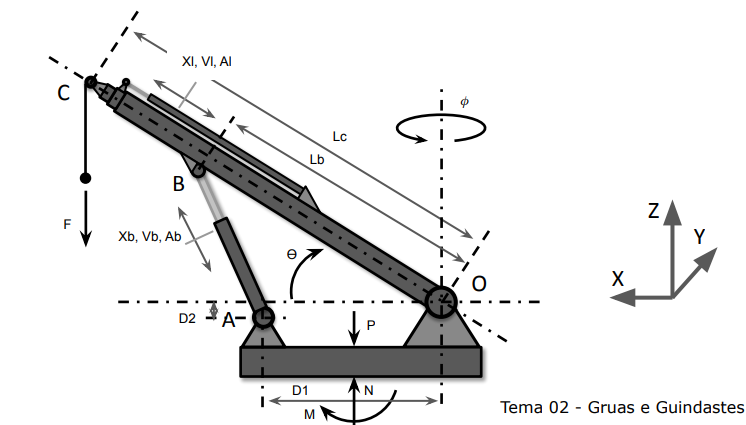



In [2]:
import sympy as sp
from sympy import symbols, atan, acos, sqrt, sin, cos, simplify, Eq
from IPython.display import display, Math
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from re import L
from IPython.display import display, HTML

In [3]:

# Ativar visualização em LaTeX
sp.init_printing(use_latex='mathjax')

# Definir variáveis simbólicas
D1, D2, Lb, Xb, Xl, Phi, x_giro = sp.symbols('D1 D2 L_b X_b X_l phi x_giro', real=True, positive=True)

# 2. Calculando Alpha (em radianos)
AO = sp.sqrt(D1**2 + D2**2)
alpha = atan(D2 / D1)

# 3. Calculando Beta com a nova forma da lei dos cossenos
cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
beta = acos(cos_beta)

# 4. Theta simbólico
theta = beta - alpha

# 5. Expressões de Cx' e Cz
CX_linha = Xl * cos(theta)
Cz = Xl * sin(theta)

# 6. Mostrar equações simplificadas
display(Eq(sp.Symbol("theta"), simplify(theta)))
print("                                               ")
display(Eq(sp.Symbol("C'_x"), simplify(CX_linha)))
print("                                               ")
display(Eq(sp.Symbol("C_z"), simplify(Cz)))


        ⎛  2     2      2      2⎞           
        ⎜D₁  + D₂  + L_b  - X_b ⎟       ⎛D₂⎞
θ = acos⎜───────────────────────⎟ - atan⎜──⎟
        ⎜          ___________  ⎟       ⎝D₁⎠
        ⎜         ╱   2     2   ⎟           
        ⎝ 2⋅L_b⋅╲╱  D₁  + D₂    ⎠           

            ⎛    ⎛  2     2      2      2⎞           ⎞
            ⎜    ⎜D₁  + D₂  + L_b  - X_b ⎟       ⎛D₂⎞⎟
C'ₓ = Xₗ⋅cos⎜acos⎜───────────────────────⎟ - atan⎜──⎟⎟
            ⎜    ⎜          ___________  ⎟       ⎝D₁⎠⎟
            ⎜    ⎜         ╱   2     2   ⎟           ⎟
            ⎝    ⎝ 2⋅L_b⋅╲╱  D₁  + D₂    ⎠           ⎠

            ⎛    ⎛  2     2      2      2⎞           ⎞
            ⎜    ⎜D₁  + D₂  + L_b  - X_b ⎟       ⎛D₂⎞⎟
C_z = Xₗ⋅sin⎜acos⎜───────────────────────⎟ - atan⎜──⎟⎟
            ⎜    ⎜          ___________  ⎟       ⎝D₁⎠⎟
            ⎜    ⎜         ╱   2     2   ⎟           ⎟
            ⎝    ⎝ 2⋅L_b⋅╲╱  D₁  + D₂    ⎠           ⎠

In [4]:
#OBS: A VARIAÇÃO EM PHI NÃO OCORRE NO PONTO O, HÁ UMA DEFASAGEM EM RELAÇÃO A X_giro (ditância do centro de giro ao ponto O)

# 5. Posições com rotação Phi
Cx = (CX_linha - x_giro) * cos(Phi)
Cy = (CX_linha - x_giro) * sin(Phi)

# 6. Mostrar expressões finais
display(sp.Eq(sp.Symbol("C_x"), sp.simplify(Cx)))
print("                                               ")
display(sp.Eq(sp.Symbol("C_y"), sp.simplify(Cy)))
print("                                               ")
display(sp.Eq(sp.Symbol("C_z"), sp.simplify(Cz)))


     ⎛      ⎛    ⎛  2     2      2      2⎞           ⎞         ⎞       
     ⎜      ⎜    ⎜D₁  + D₂  + L_b  - X_b ⎟       ⎛D₂⎞⎟         ⎟       
Cₓ = ⎜Xₗ⋅cos⎜acos⎜───────────────────────⎟ - atan⎜──⎟⎟ - x_giro⎟⋅cos(φ)
     ⎜      ⎜    ⎜          ___________  ⎟       ⎝D₁⎠⎟         ⎟       
     ⎜      ⎜    ⎜         ╱   2     2   ⎟           ⎟         ⎟       
     ⎝      ⎝    ⎝ 2⋅L_b⋅╲╱  D₁  + D₂    ⎠           ⎠         ⎠       

      ⎛      ⎛    ⎛  2     2      2      2⎞           ⎞         ⎞       
      ⎜      ⎜    ⎜D₁  + D₂  + L_b  - X_b ⎟       ⎛D₂⎞⎟         ⎟       
C_y = ⎜Xₗ⋅cos⎜acos⎜───────────────────────⎟ - atan⎜──⎟⎟ - x_giro⎟⋅sin(φ)
      ⎜      ⎜    ⎜          ___________  ⎟       ⎝D₁⎠⎟         ⎟       
      ⎜      ⎜    ⎜         ╱   2     2   ⎟           ⎟         ⎟       
      ⎝      ⎝    ⎝ 2⋅L_b⋅╲╱  D₁  + D₂    ⎠           ⎠         ⎠       

            ⎛    ⎛  2     2      2      2⎞           ⎞
            ⎜    ⎜D₁  + D₂  + L_b  - X_b ⎟       ⎛D₂⎞⎟
C_z = Xₗ⋅sin⎜acos⎜───────────────────────⎟ - atan⎜──⎟⎟
            ⎜    ⎜          ___________  ⎟       ⎝D₁⎠⎟
            ⎜    ⎜         ╱   2     2   ⎟           ⎟
            ⎝    ⎝ 2⋅L_b⋅╲╱  D₁  + D₂    ⎠           ⎠

In [5]:

# Tempo
t = sp.Symbol('t')

# Funções do tempo
Xb = sp.Function('X_b')(t)
Xl = sp.Function('X_l')(t)
Phi = sp.Function('Phi')(t)

# Ponto de rotação (giro não é em O)
Xp = sp.symbols('X_p', real=True)

# AO e alpha
AO = sp.sqrt(D1**2 + D2**2)
alpha = sp.atan(D2 / D1)

# Ângulo theta
cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
beta = sp.acos(cos_beta)
theta = beta - alpha

# Projeções
Cx_linha = Xl * sp.cos(theta)
Cz = Xl * sp.sin(theta)

# Rotação em torno de (Xp)
Cx = Xp + (Cx_linha - Xp) * sp.cos(Phi)
Cy = (Cx_linha - Xp) * sp.sin(Phi)

# Velocidades (sem simplify)
Cx_dot = sp.diff(Cx, t)
Cy_dot = sp.diff(Cy, t)
Cz_dot = sp.diff(Cz, t)

# Acelerações (sem simplify)
Cx_ddot = sp.diff(Cx_dot, t)
Cy_ddot = sp.diff(Cy_dot, t)
Cz_ddot = sp.diff(Cz_dot, t)

# Exibir resultados
print("=== POSIÇÕES ===")
print("                                               ")
display(sp.Eq(sp.Symbol('C_x(t)'), Cx))
print("                                               ")
display(sp.Eq(sp.Symbol('C_y(t)'), Cy))
print("                                               ")
display(sp.Eq(sp.Symbol('C_z(t)'), Cz))
print("                                               ")

print("=== VELOCIDADES ===")
print("                                               ")
display(sp.Eq(sp.Symbol("C_x_dot(t)"), Cx_dot))
print("                                               ")
display(sp.Eq(sp.Symbol("C_y_dot(t)"), Cy_dot))
print("                                               ")
display(sp.Eq(sp.Symbol("C_z_dot(t)"), Cz_dot))
print("                                               ")

print("=== ACELERAÇÕES ===")
print("                                               ")
display(sp.Eq(sp.Symbol("C_x_ddot(t)"), Cx_ddot))
print("                                               ")
display(sp.Eq(sp.Symbol("C_y_ddot(t)"), Cy_ddot))
print("                                               ")
display(sp.Eq(sp.Symbol("C_z_ddot(t)"), Cz_ddot))
print("                                               ")


=== POSIÇÕES ===
                                               


             ⎛               ⎛    ⎛  2     2      2      2   ⎞           ⎞⎞    ↪
             ⎜               ⎜    ⎜D₁  + D₂  + L_b  - X_b (t)⎟       ⎛D₂⎞⎟⎟    ↪
Cₓ₍ₜ₎ = Xₚ + ⎜-Xₚ + Xₗ(t)⋅cos⎜acos⎜──────────────────────────⎟ - atan⎜──⎟⎟⎟⋅co ↪
             ⎜               ⎜    ⎜            ___________   ⎟       ⎝D₁⎠⎟⎟    ↪
             ⎜               ⎜    ⎜           ╱   2     2    ⎟           ⎟⎟    ↪
             ⎝               ⎝    ⎝   2⋅L_b⋅╲╱  D₁  + D₂     ⎠           ⎠⎠    ↪

↪        
↪        
↪ s(Φ(t))
↪        
↪        
↪        

         ⎛               ⎛    ⎛  2     2      2      2   ⎞           ⎞⎞        ↪
         ⎜               ⎜    ⎜D₁  + D₂  + L_b  - X_b (t)⎟       ⎛D₂⎞⎟⎟        ↪
C_y(t) = ⎜-Xₚ + Xₗ(t)⋅cos⎜acos⎜──────────────────────────⎟ - atan⎜──⎟⎟⎟⋅sin(Φ( ↪
         ⎜               ⎜    ⎜            ___________   ⎟       ⎝D₁⎠⎟⎟        ↪
         ⎜               ⎜    ⎜           ╱   2     2    ⎟           ⎟⎟        ↪
         ⎝               ⎝    ⎝   2⋅L_b⋅╲╱  D₁  + D₂     ⎠           ⎠⎠        ↪

↪    
↪    
↪ t))
↪    
↪    
↪    

                  ⎛    ⎛  2     2      2      2   ⎞           ⎞
                  ⎜    ⎜D₁  + D₂  + L_b  - X_b (t)⎟       ⎛D₂⎞⎟
C_z(t) = Xₗ(t)⋅sin⎜acos⎜──────────────────────────⎟ - atan⎜──⎟⎟
                  ⎜    ⎜            ___________   ⎟       ⎝D₁⎠⎟
                  ⎜    ⎜           ╱   2     2    ⎟           ⎟
                  ⎝    ⎝   2⋅L_b⋅╲╱  D₁  + D₂     ⎠           ⎠

                                               
=== VELOCIDADES ===
                                               


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
               ⎛               ⎛    ⎛  2     2      2      2   ⎞           ⎞⎞  ↪
               ⎜               ⎜    ⎜D₁  + D₂  + L_b  - X_b (t)⎟       ⎛D₂⎞⎟⎟  ↪
C_x_dot(t) = - ⎜-Xₚ + Xₗ(t)⋅cos⎜acos⎜──────────────────────────⎟ - atan⎜──⎟⎟⎟⋅ ↪
               ⎜               ⎜    ⎜            ___________   ⎟       ⎝D₁⎠⎟⎟  ↪
               ⎜               ⎜    ⎜           ╱   2     2    ⎟           ⎟⎟  ↪
               ⎝               ⎝    ⎝   2⋅L_b⋅╲╱  D₁  + D₂     ⎠           ⎠⎠  ↪
                                                                               ↪
                                                                               ↪
                            

                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
             ⎛               ⎛    ⎛  2     2      2      2   ⎞           ⎞⎞    ↪
             ⎜               ⎜    ⎜D₁  + D₂  + L_b  - X_b (t)⎟       ⎛D₂⎞⎟⎟    ↪
C_y_dot(t) = ⎜-Xₚ + Xₗ(t)⋅cos⎜acos⎜──────────────────────────⎟ - atan⎜──⎟⎟⎟⋅co ↪
             ⎜               ⎜    ⎜            ___________   ⎟       ⎝D₁⎠⎟⎟    ↪
             ⎜               ⎜    ⎜           ╱   2     2    ⎟           ⎟⎟    ↪
             ⎝               ⎝    ⎝   2⋅L_b⋅╲╱  D₁  + D₂     ⎠           ⎠⎠    ↪
                                                                               ↪
                                                                               ↪
                            

                                                                               ↪
                                                                               ↪
                                                                          X_b( ↪
                                                                               ↪
                ⎛    ⎛  2     2      2      2   ⎞           ⎞                  ↪
                ⎜    ⎜D₁  + D₂  + L_b  - X_b (t)⎟       ⎛D₂⎞⎟ d                ↪
C_z_dot(t) = sin⎜acos⎜──────────────────────────⎟ - atan⎜──⎟⎟⋅──(Xₗ(t)) + ──── ↪
                ⎜    ⎜            ___________   ⎟       ⎝D₁⎠⎟ dt               ↪
                ⎜    ⎜           ╱   2     2    ⎟           ⎟                  ↪
                ⎝    ⎝   2⋅L_b⋅╲╱  D₁  + D₂     ⎠           ⎠                  ↪
                                                                               ↪
                                                                               ↪
                            

                                               
=== ACELERAÇÕES ===
                                               


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                ⎛               ⎛    ⎛  2     2      2      2   ⎞           ⎞⎞ ↪
                ⎜               ⎜    ⎜D₁  + D₂  + L_b  - X_b (t)⎟       ⎛D₂⎞⎟⎟ ↪
C_x_ddot(t) = - ⎜-Xₚ + Xₗ(t)⋅cos⎜acos⎜──────────────────────────⎟ - atan⎜──⎟⎟⎟ ↪
                ⎜               ⎜    ⎜            ___________   ⎟       ⎝D₁⎠⎟⎟ ↪
                ⎜               ⎜    ⎜           ╱   2     2    ⎟           ⎟⎟ ↪
                ⎝               ⎝    ⎝   2⋅L_b⋅╲╱  D₁  + D₂     ⎠           ⎠⎠ ↪
                                                                               ↪
                                                                               ↪
                            

                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                ⎛               ⎛    ⎛  2     2      2      2   ⎞           ⎞⎞ ↪
                ⎜               ⎜    ⎜D₁  + D₂  + L_b  - X_b (t)⎟       ⎛D₂⎞⎟⎟ ↪
C_y_ddot(t) = - ⎜-Xₚ + Xₗ(t)⋅cos⎜acos⎜──────────────────────────⎟ - atan⎜──⎟⎟⎟ ↪
                ⎜               ⎜    ⎜            ___________   ⎟       ⎝D₁⎠⎟⎟ ↪
                ⎜               ⎜    ⎜           ╱   2     2    ⎟           ⎟⎟ ↪
                ⎝               ⎝    ⎝   2⋅L_b⋅╲╱  D₁  + D₂     ⎠           ⎠⎠ ↪
                                                                               ↪
                                                                               ↪
                            

                                                                               ↪
                                                                               ↪
                                                                            X_ ↪
                                                                               ↪
                 ⎛    ⎛  2     2      2      2   ⎞           ⎞  2              ↪
                 ⎜    ⎜D₁  + D₂  + L_b  - X_b (t)⎟       ⎛D₂⎞⎟ d               ↪
C_z_ddot(t) = sin⎜acos⎜──────────────────────────⎟ - atan⎜──⎟⎟⋅───(Xₗ(t)) + ── ↪
                 ⎜    ⎜            ___________   ⎟       ⎝D₁⎠⎟   2             ↪
                 ⎜    ⎜           ╱   2     2    ⎟           ⎟ dt              ↪
                 ⎝    ⎝   2⋅L_b⋅╲╱  D₁  + D₂     ⎠           ⎠                 ↪
                                                                               ↪
                                                                               ↪
                            

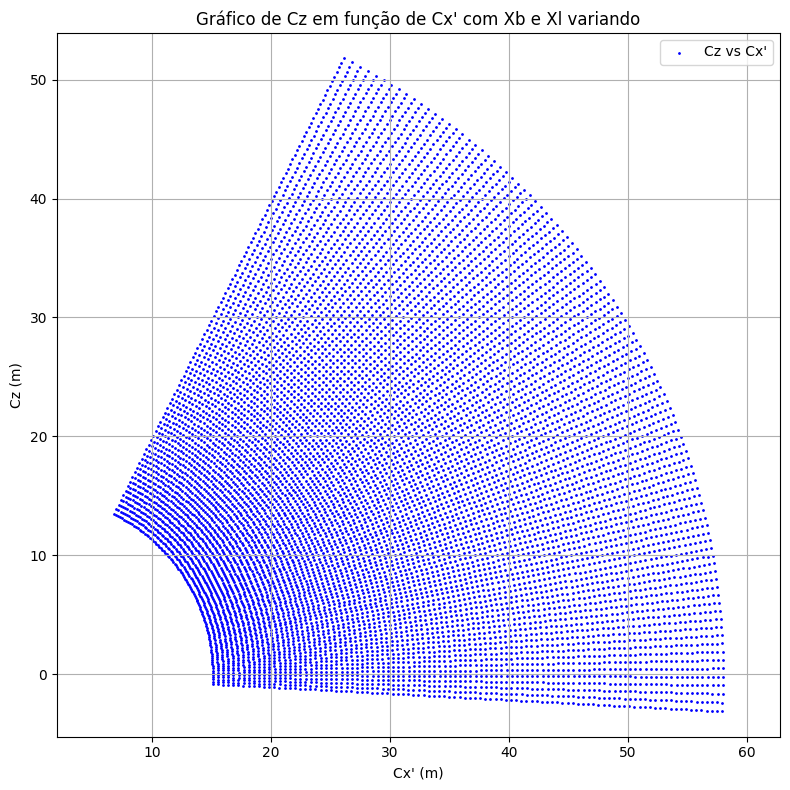

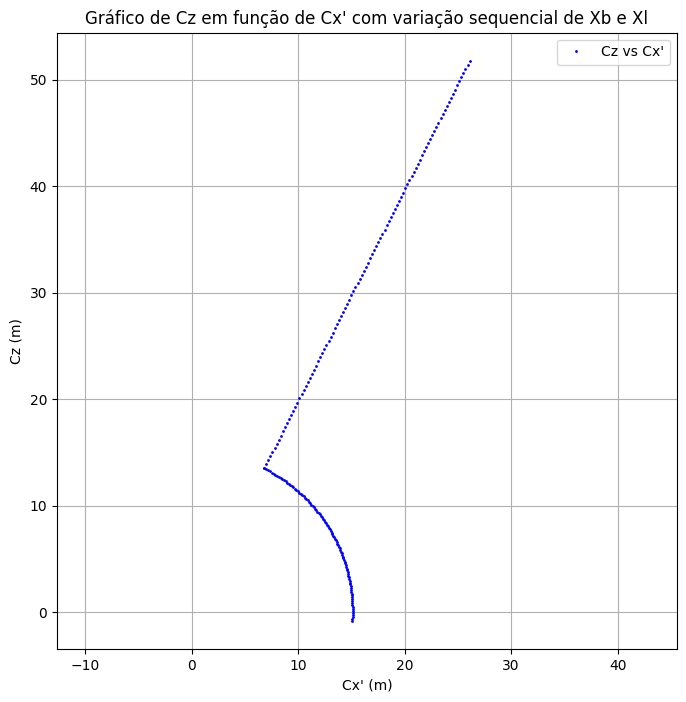

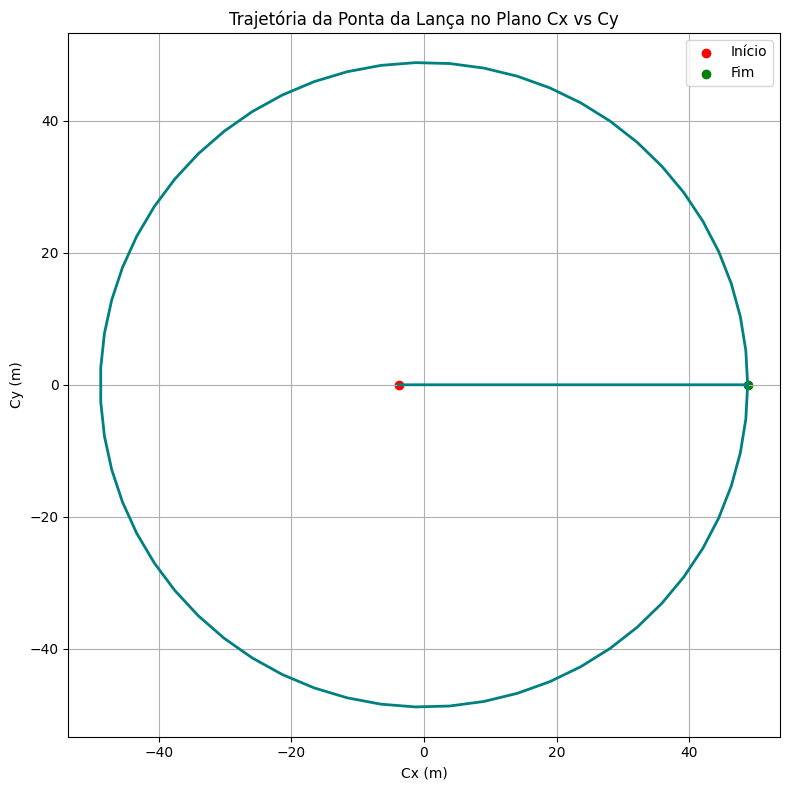

In [6]:
#OBS: X_giro aqui é Xc
# Dados fixos
D1 = 2.5
D2 = 2
Lb = 6.7
X_giro = 3.0     # Centro de rotação (onde ocorre a rotação Phi)

# Intervalos
Xb_vals = np.linspace(4.5, 8, 100)   # valores de Xb (varia mais devagar)
Xl_vals = np.linspace(15.107, 58, 100)  # valores de Xl (varia mais rápido)
phi_vals = np.radians(np.linspace(0,360 , 60))  # Convertendo para radianos

# Constantes geométricas
AO = np.sqrt(D1**2 + D2**2)
alpha = np.arctan(D2 / D1)

# Preparar listas
Cx_linha = []
Cz = []

# Loop em estilo "leque"
for Xb in Xb_vals:
    for Xl in Xl_vals:
        cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
        cos_beta = np.clip(cos_beta, -1.0, 1.0)  # evita domínio inválido
        beta = np.arccos(cos_beta)
        theta = beta - alpha

        Cx_linha.append(Xl * np.cos(theta))
        Cz.append(Xl * np.sin(theta))



# Plot
plt.figure(figsize=(8, 8))
plt.scatter(Cx_linha, Cz, s=1, color='blue', label="Cz vs Cx'")
plt.xlabel("Cx' (m)")
plt.ylabel("Cz (m)")
plt.title("Gráfico de Cz em função de Cx' com Xb e Xl variando")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()
print (" ")

# Armazenar coordenadas
Cx_prime_vals = []
Cz_vals = []

# Etapa 1: Xb varia, Xl fixo no início
Xl_const = Xl_vals[0]
for Xb in Xb_vals:
    cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
    cos_beta = np.clip(cos_beta, -1.0, 1.0)
    beta = np.arccos(cos_beta)
    theta = beta - alpha
    Lc = Xl_const
    Cx_prime = Lc * np.cos(theta)
    Cz = Lc * np.sin(theta)
    Cx_prime_vals.append(Cx_prime)
    Cz_vals.append(Cz)

# Etapa 2: Xl varia, Xb fixo no valor final
Xb_const = Xb_vals[-1]
for Xl in Xl_vals:
    cos_beta = (AO**2 + Lb**2 - Xb_const**2) / (2 * AO * Lb)
    cos_beta = np.clip(cos_beta, -1.0, 1.0)
    beta = np.arccos(cos_beta)
    theta = beta - alpha
    Lc = Xl
    Cx_prime = Lc * np.cos(theta)
    Cz = Lc * np.sin(theta)
    Cx_prime_vals.append(Cx_prime)
    Cz_vals.append(Cz)



# Plot

plt.figure(figsize=(8, 8))
plt.plot(Cx_prime_vals, Cz_vals, 'b.', markersize=2, label="Cz vs Cx'")
plt.xlabel("Cx' (m)")
plt.ylabel("Cz (m)")
plt.title("Gráfico de Cz em função de Cx' com variação sequencial de Xb e Xl")
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

print (" ")
# === Valores fixos finais para fase de variação de phi ===
Xb_fixed = Xb_vals[-1]
Xl_fixed = Xl_vals[-1]

# === Pré-calcular constantes ===
AO = np.sqrt(D1**2 + D2**2)
alpha = np.arctan(D2 / D1)

# === Função para calcular theta ===
def calc_theta(Xb):
    cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
    cos_beta = np.clip(cos_beta, -1, 1)  # Evita domínio inválido
    beta = np.arccos(cos_beta)
    return beta - alpha

# === Armazenar coordenadas Cx e Cy ===
Cx_all = []
Cy_all = []

# === Etapa 1: variação de Xb (Xl e phi fixos) ===
for Xb in Xb_vals:
    theta = calc_theta(Xb)
    Cx_linha = Xl_vals[0] * np.sin(theta)
    Cx = (Cx_linha - X_giro) * np.cos(phi_vals[0])
    Cy = (Cx_linha - X_giro) * np.sin(phi_vals[0])
    Cx_all.append(Cx)
    Cy_all.append(Cy)

# === Etapa 2: variação de Xl (Xb fixo, phi fixo) ===
theta = calc_theta(Xb_fixed)
for Xl in Xl_vals:
    Cx_linha = Xl * np.sin(theta)
    Cx = (Cx_linha - X_giro) * np.cos(phi_vals[0])
    Cy = (Cx_linha - X_giro) * np.sin(phi_vals[0])
    Cx_all.append(Cx)
    Cy_all.append(Cy)

# === Etapa 3: variação de phi (Xb e Xl fixos) ===
theta = calc_theta(Xb_fixed)
Cx_linha = Xl_fixed * np.sin(theta)
for phi in phi_vals:
    Cx = (Cx_linha - X_giro) * np.cos(phi)
    Cy = (Cx_linha - X_giro) * np.sin(phi)
    Cx_all.append(Cx)
    Cy_all.append(Cy)

# === Converter listas em arrays ===
Cx_all = np.array(Cx_all)
Cy_all = np.array(Cy_all)

# === Plotar resultado ===
plt.figure(figsize=(8, 8))
plt.plot(Cx_all, Cy_all, color='teal', lw=2)
plt.scatter(Cx_all[0], Cy_all[0], color='red', label='Início')
plt.scatter(Cx_all[-1], Cy_all[-1], color='green', label='Fim')
plt.title("Trajetória da Ponta da Lança no Plano Cx vs Cy")
plt.xlabel("Cx (m)")
plt.ylabel("Cy (m)")
plt.grid(True)
plt.axis("equal")
plt.legend()
plt.tight_layout()
plt.show()



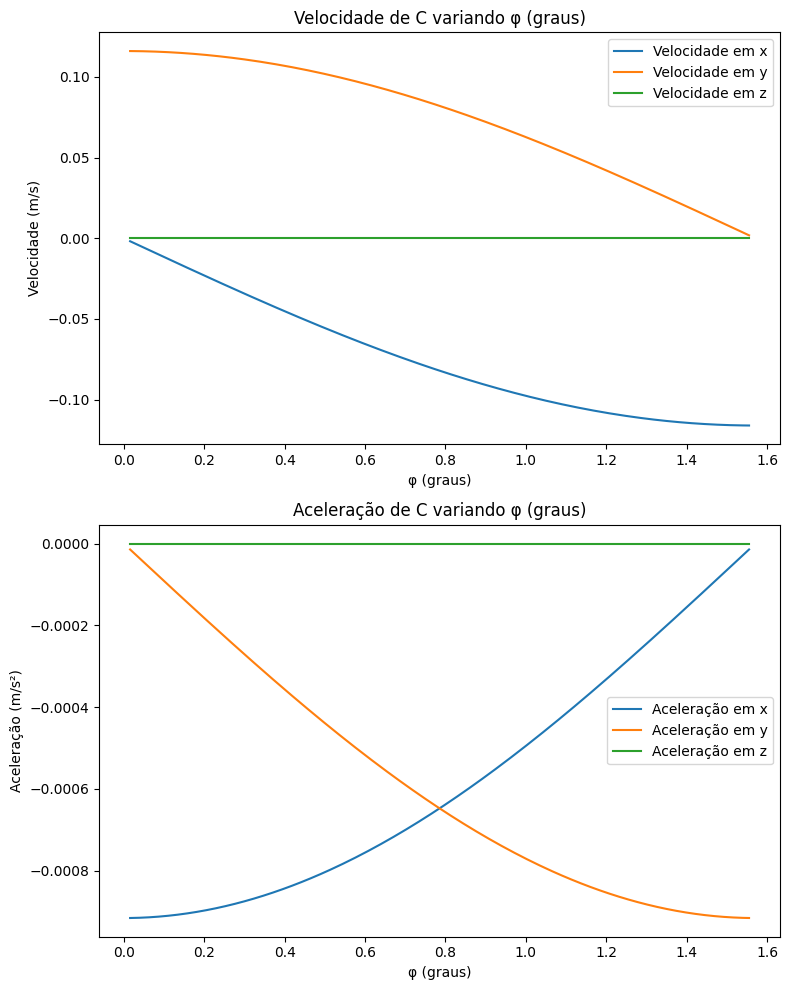

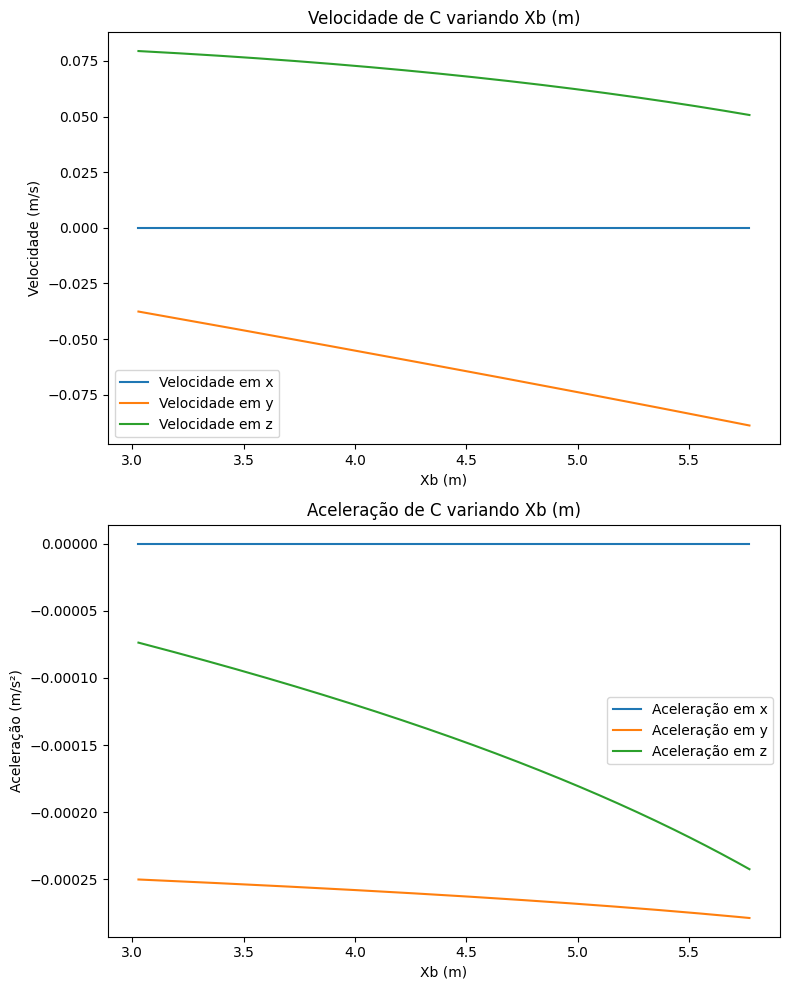

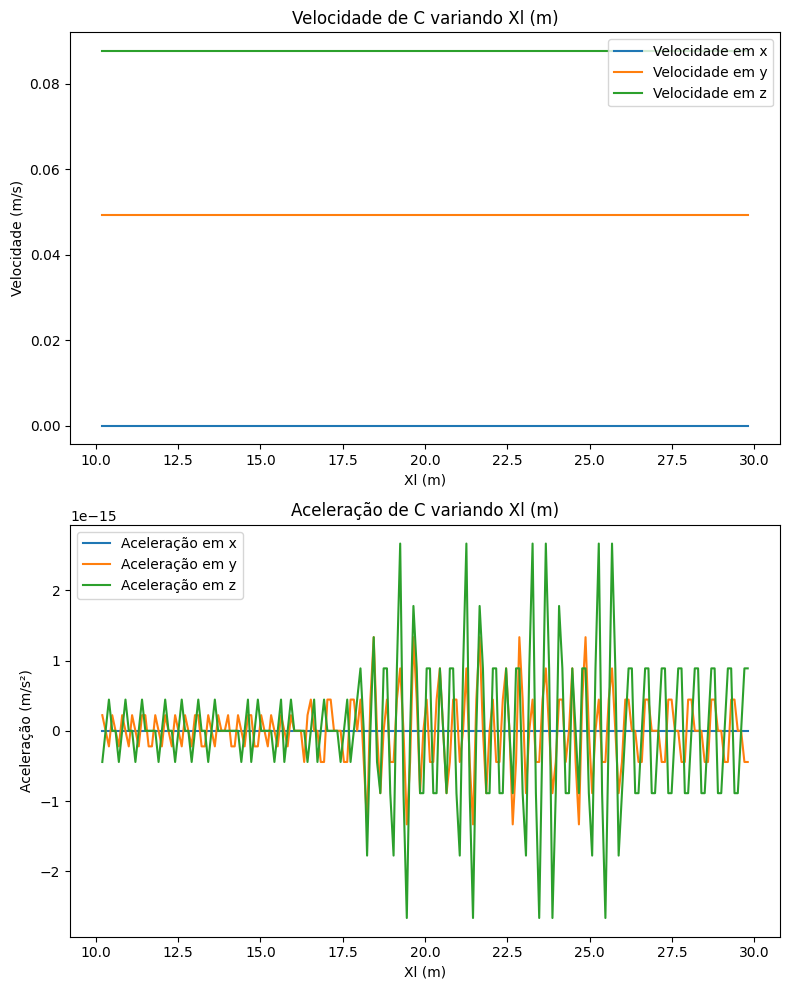

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Valores constantes
D1 = 5.0
D2 = 0.85
Lb = 5.0
AO = np.sqrt(D1**2 + D2**2)
alpha = np.arctan(D2 / D1)

# Valores finais de Xb e Xl
Xb_final = 5.8
Xl_final = 30.0

# Parâmetros para variação
N = 200
phi_vals = np.radians(np.linspace(0, 90, N))
Xb_vals = np.linspace(3.0, Xb_final, N)
Xl_vals = np.linspace(10.0, Xl_final, N)

def calcula_theta(Xb):
    cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
    beta = np.arccos(np.clip(cos_beta, -1, 1))
    return beta - alpha

def calcula_posicoes(Xb, Xl, phi):
    theta = calcula_theta(Xb)
    Cx_linha = Xl * np.cos(theta)
    Cz = Xl * np.sin(theta)
    Cx = Cx_linha * np.cos(phi)
    Cy = Cx_linha * np.sin(phi)
    return Cx, Cy, Cz, Cx_linha

# Para armazenar velocidades e acelerações
velocidades = {"phi": [], "Xb": [], "Xl": []}
aceleracoes = {"phi": [], "Xb": [], "Xl": []}

def calcula_derivadas(variavel, nome):
    Cx_list = []
    Cy_list = []
    Cz_list = []

    for val in variavel:
        if nome == "phi":
            Cx, Cy, Cz, _ = calcula_posicoes(Xb_final, Xl_final, val)
        elif nome == "Xb":
            Cx, Cy, Cz, _ = calcula_posicoes(val, Xl_final, np.radians(90))
        elif nome == "Xl":
            Cx, Cy, Cz, _ = calcula_posicoes(Xb_final, val, np.radians(90))
        Cx_list.append(Cx)
        Cy_list.append(Cy)
        Cz_list.append(Cz)

    # Derivadas aproximadas
    dt = 1  # intervalo fictício
    v_Cx = np.gradient(Cx_list, dt)
    v_Cy = np.gradient(Cy_list, dt)
    v_Cz = np.gradient(Cz_list, dt)

    a_Cx = np.gradient(v_Cx, dt)
    a_Cy = np.gradient(v_Cy, dt)
    a_Cz = np.gradient(v_Cz, dt)

    velocidades[nome] = (v_Cx, v_Cy, v_Cz)
    aceleracoes[nome] = (a_Cx, a_Cy, a_Cz)

    return variavel, v_Cx, v_Cy, v_Cz, a_Cx, a_Cy, a_Cz

def plota_resultados(variavel, nome, label):
    x_vals, vx, vy, vz, ax, ay, az = calcula_derivadas(variavel, nome)

    # Restringindo índices de 2 a N-2
    start_idx = 2
    end_idx = N - 2

    fig, axs = plt.subplots(2, 1, figsize=(8, 10))
    axs[0].plot(x_vals[start_idx:end_idx], vx[start_idx:end_idx], label='Velocidade em x')
    axs[0].plot(x_vals[start_idx:end_idx], vy[start_idx:end_idx], label='Velocidade em y')
    axs[0].plot(x_vals[start_idx:end_idx], vz[start_idx:end_idx], label='Velocidade em z')
    axs[0].set_title(f'Velocidade de C variando {label}')
    axs[0].set_xlabel(label)
    axs[0].set_ylabel('Velocidade (m/s)')
    axs[0].legend()

    axs[1].plot(x_vals[start_idx:end_idx], ax[start_idx:end_idx], label='Aceleração em x')
    axs[1].plot(x_vals[start_idx:end_idx], ay[start_idx:end_idx], label='Aceleração em y')
    axs[1].plot(x_vals[start_idx:end_idx], az[start_idx:end_idx], label='Aceleração em z')
    axs[1].set_title(f'Aceleração de C variando {label}')
    axs[1].set_xlabel(label)
    axs[1].set_ylabel('Aceleração (m/s²)')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

# Gerar gráficos
plota_resultados(phi_vals, "phi", "φ (graus)")
plota_resultados(Xb_vals, "Xb", "Xb (m)")
plota_resultados(Xl_vals, "Xl", "Xl (m)")

**PARTE 2- ENCONTRAR O CG E INERCIA DA LANÇA**

In [29]:

# Variáveis geométricas e angulares
D1, D2, Lb, Xb, Xl, rho = sp.symbols('D1 D2 Lb Xb Xl rho', real=True, positive=True)
AO = sp.sqrt(D1**2 + D2**2)
alpha = sp.atan(D2 / D1)
cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
beta = sp.acos(cos_beta)
theta = beta - alpha

# Número de seções
N = 12
# Listas de parâmetros geométricos
L = []
h = []
r = []
e = []

# Volume, massa e distância do CG para cada contribuição
V_distribuida = []
m_distribuida = []
d_distribuida = []

m_concentrada = []
d_concentrada = []

# Volume, massa e distância do CG para cada contribuição
for i in range(N):
    # Símbolos de geometria da seção i
    L_i = sp.Symbol(f'L{i+1}', real=True, positive=True)
    h_i = sp.Symbol(f'h{i+1}', real=True, positive=True)
    r_i = sp.Symbol(f'r{i+1}', real=True, positive=True)
    e_i = sp.Symbol(f'e{i+1}', real=True, positive=True)

    # Adiciona às listas de parâmetros geométricos
    L.append(L_i)
    h.append(h_i)
    r.append(r_i)
    e.append(e_i)

# Agora percorremos de novo para calcular as massas distribuídas e concentradas
for i in range(N):
    # Comprimento estendido real da seção i
    l_estendido = sp.Piecewise(
        (L[i], sum(L[:i]) + L[i] <= Xl),  # Se a seção inteira cabe
        (Xl - sum(L[:i]), sum(L[:i]) < Xl),  # Se apenas parte da seção cabe
        (0, True)  # Caso contrário, desativar seção
    )

    # Massa linear (massa por metro) da seção i
    A_secao = 2 * h_i * e_i  + ((sp.pi * r_i**2 / 2) - ((sp.pi * (r_i-e_i)**2) / 2)) + 2*e_i*r_i
# área da parede fina
    massa_linear = rho * A_secao  # massa por metro

    # Massa distribuída (parte estendida)
    m_dist = massa_linear * l_estendido
    m_distribuida.append(m_dist)

    # Posição média da parte distribuída
    if i == 0:
        d_dist = l_estendido / 2
    else:
        d_dist = sum(L[:i]) + l_estendido / 2
    d_distribuida.append(d_dist)

    # Massa concentrada (parte recolhida)
    m_conc = massa_linear * (L[i] - l_estendido)
    m_concentrada.append(m_conc)

    # Posição da massa concentrada (fim da seção anterior)
    if i == 0:
        d_conc = 0  # a base da lança fixa
    else:
        d_conc = sum(L[:i])
    d_concentrada.append(d_conc)

# Agora, computa o CG de todas as contribuições (distribuídas e concentradas)
Cx_contribuicoes = []
Cz_contribuicoes = []
massa_contribuicoes = []

for i in range(N):
    # Parte distribuída
    Cx_distribuida = d_distribuida[i] * sp.cos(theta)
    Cz_distribuida = d_distribuida[i] * sp.sin(theta)
    Cx_contribuicoes.append(m_distribuida[i] * Cx_distribuida)
    Cz_contribuicoes.append(m_distribuida[i] * Cz_distribuida)
    massa_contribuicoes.append(m_distribuida[i])

    # Parte concentrada
    Cx_concentrada = d_concentrada[i] * sp.cos(theta)
    Cz_concentrada = d_concentrada[i] * sp.sin(theta)
    Cx_contribuicoes.append(m_concentrada[i] * Cx_concentrada)
    Cz_contribuicoes.append(m_concentrada[i] * Cz_concentrada)
    massa_contribuicoes.append(m_concentrada[i])

# Massa total
M_total = sum(massa_contribuicoes)

# Cálculo final do CG
Cx_cg = sum(Cx_contribuicoes) / M_total
Cz_cg = sum(Cz_contribuicoes) / M_total

# Resultados
display(sp.Eq(sp.Symbol("C_{x,CG}"), (Cx_cg)))
display(sp.Eq(sp.Symbol("C_{z,CG}"), (Cz_cg)))

                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                ⎛     ⎛⎧   L₂     for Xl ≥ L₁ + L₂⎞⎞ ⎛                         ↪
                ⎜     ⎜⎪                          ⎟⎟ ⎜                    π⋅r₅ ↪
           L₁⋅ρ⋅⎜L₂ - ⎜⎨-L₁ + Xl    for L₁ < Xl   ⎟⎟⋅⎜2⋅e₅⋅h₅ + 2⋅e₅⋅r₅ + ──── ↪
                ⎜     ⎜⎪                          ⎟⎟ ⎝                      2  ↪
                ⎝     ⎝⎩   0         otherwise    ⎠⎠                           ↪
                                                                               ↪
C_{x,CG} = ─────────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                            

                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                ⎛     ⎛⎧   L₂     for Xl ≥ L₁ + L₂⎞⎞ ⎛                         ↪
                ⎜     ⎜⎪                          ⎟⎟ ⎜                    π⋅r₅ ↪
           L₁⋅ρ⋅⎜L₂ - ⎜⎨-L₁ + Xl    for L₁ < Xl   ⎟⎟⋅⎜2⋅e₅⋅h₅ + 2⋅e₅⋅r₅ + ──── ↪
                ⎜     ⎜⎪                          ⎟⎟ ⎝                      2  ↪
                ⎝     ⎝⎩   0         otherwise    ⎠⎠                           ↪
                                                                               ↪
C_{z,CG} = ─────────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                            

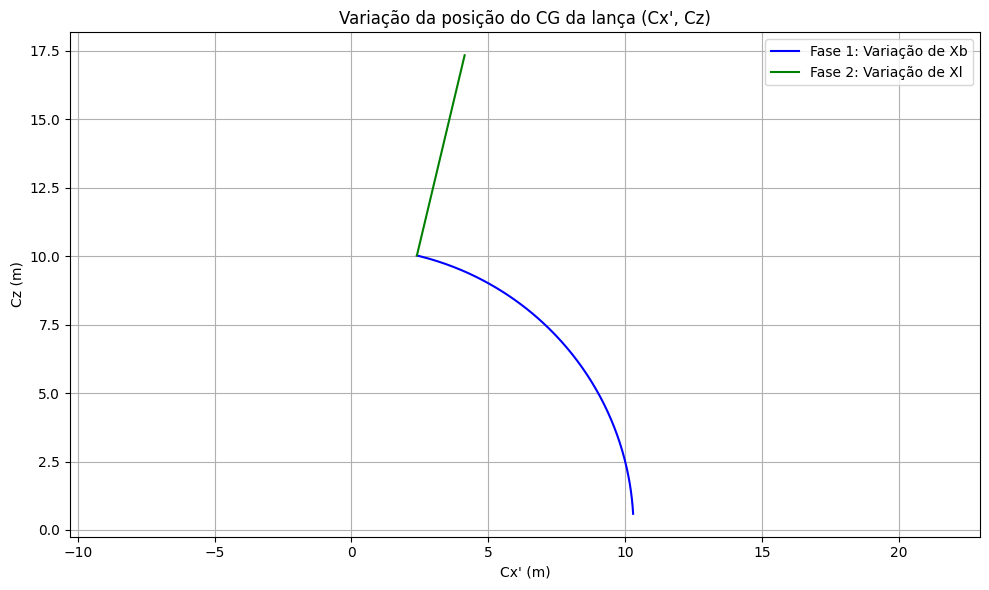

In [56]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros fixos
D1 = 3.7
D2 = 2
Lb = 7.5
rho = 7800

# Xb variando , Xl constante
Xb_inicio = 4.5
Xb_fim = 9.5
Xb_vals = np.linspace(Xb_inicio, Xb_fim, 200)

Xl_const = 13  # valor inicial de Xl (primeira seção)

# Fase 2: Xl variando, Xb constante
Xl_vals = np.linspace(13, 29.58, 200)
Xb_const = Xb_fim  # <<< Ajustado para manter coerência visual

# Geometria e massas das lanças
N = 12
valores_h = [0.65, 0.59]
valores_r = [0.35, 0.29]

# Garantir que valores_h e valores_r tenham tamanho N
while len(valores_h) < N:
    valores_h.append(valores_h[-1] * 0.95)
while len(valores_r) < N:
    valores_r.append(valores_r[-1] * 0.95)

valores_Xl = [13, 17.14, 21.28, 25.42, 29.56, 33.7, 37.84, 41.98, 46.12, 50.26, 54.4, 58]
valores_L = [valores_Xl[0]]
for i in range(1, len(valores_Xl)):
    valores_L.append(valores_Xl[i] - valores_Xl[i-1])

valores_e = [0.05, 0.03] + [0.03] * (N - 2)

# Cálculo de massas e áreas
m = []
massa_linear = []
for i in range(N):
    A_secao = 2 * valores_h[i] * valores_e[i] + ((np.pi * valores_r[i]**2 / 2) - ((np.pi * (valores_r[i] - valores_e[i])**2) / 2)) + 2 * valores_e[i] * valores_r[i]
    massa_linear.append(rho * A_secao)
    V_i = massa_linear[i] * valores_L[i]
    m.append(rho * V_i)

AO = np.sqrt(D1**2 + D2**2)
alpha = np.arctan(D2 / D1)

def calcula_CG(Xb, Xl_total):
    cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
    cos_beta = np.clip(cos_beta, -1.0, 1.0)
    beta = np.arccos(cos_beta)
    theta = beta - alpha

    # Cálculo de d_i de acordo com o Xl_total usando validação de comprimento
    d_distribuida = []
    m_distribuida = []
    d_concentrada = []
    m_concentrada = []
    L_acumulado = 0  # Inicializa o comprimento acumulado como 0

    for i in range(N):
        # Comprimento estendido real da seção i
        if L_acumulado + valores_L[i] <= Xl_total:
            l_estendido = valores_L[i]  # Se a seção inteira cabe
        elif L_acumulado < Xl_total:
            l_estendido = Xl_total - L_acumulado  # Se apenas parte da seção cabe
        else:
            l_estendido = 0  # Caso contrário, a seção não contribui

        # Massa distribuída (parte estendida)
        m_dist = massa_linear[i] * l_estendido
        d_dist = L_acumulado + l_estendido / 2
        d_distribuida.append(d_dist)
        m_distribuida.append(m_dist)

        # Massa concentrada (parte recolhida)
        l_concentrada = valores_L[i] - l_estendido
        m_conc = massa_linear[i] * l_concentrada
        d_conc = L_acumulado + l_estendido
        d_concentrada.append(d_conc)
        m_concentrada.append(m_conc)

        # Atualiza o comprimento acumulado numericamente
        L_acumulado += l_estendido

    # CG ponderado
    Cx = (sum(m_distribuida[i] * d_distribuida[i] * np.cos(theta) for i in range(N)) +
          sum(m_concentrada[i] * d_concentrada[i] * np.cos(theta) for i in range(N))) / sum(m_distribuida + m_concentrada)
    Cz = (sum(m_distribuida[i] * d_distribuida[i] * np.sin(theta) for i in range(N)) +
          sum(m_concentrada[i] * d_concentrada[i] * np.sin(theta) for i in range(N))) / sum(m_distribuida + m_concentrada)

    return Cx, Cz

# Fase 1 - Variação de Xb
Cx_cg_fase1, Cz_cg_fase1 = [], []
for xb in Xb_vals:
    cx, cz = calcula_CG(xb, Xl_const)
    Cx_cg_fase1.append(cx)
    Cz_cg_fase1.append(cz)

# Fase 2 - Variação de Xl
Cx_cg_fase2, Cz_cg_fase2 = [], []
for xl in Xl_vals:
    cx, cz = calcula_CG(Xb_const, xl)
    Cx_cg_fase2.append(cx)
    Cz_cg_fase2.append(cz)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(Cx_cg_fase1, Cz_cg_fase1, 'b-', label='Fase 1: Variação de Xb')
plt.plot(Cx_cg_fase2, Cz_cg_fase2, 'g-', label='Fase 2: Variação de Xl')
plt.xlabel("Cx' (m)")
plt.ylabel("Cz (m)")
plt.title("Variação da posição do CG da lança (Cx', Cz)")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.show()

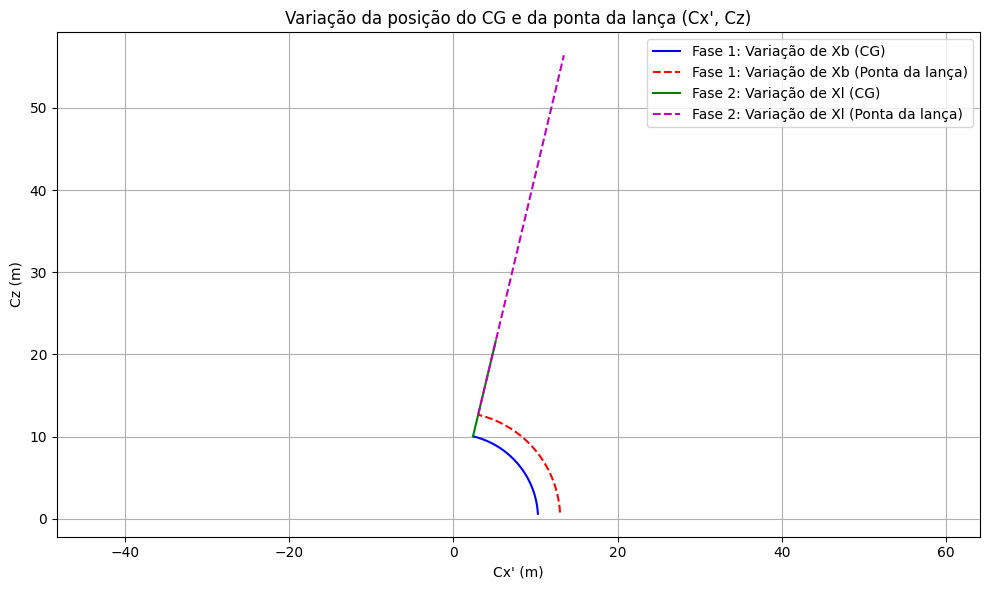

In [57]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def definir_variaveis_simbolicas(N):
    Xb, D1, D2, Lb, Mmax, Xgiro, rho, g = sp.symbols('Xb D1 D2 Lb Mmax Xgiro rho g')

    Xl_list, L_list, h, r, e, V_distribuida, m_distribuida, d_distribuida = [], [], [], [], [], [], [], []
    m_concentrada, d_concentrada = [], []

    for i in range(N):
        L_i = sp.Symbol(f'Xl{i+1}', real=True, positive=True)
        h_i = sp.Symbol(f'h{i+1}', real=True, positive=True)
        r_i = sp.Symbol(f'r{i+1}', real=True, positive=True)
        e_i = sp.Symbol(f'e{i+1}', real=True, positive=True)

        L_list.append(L_i)
        h.append(h_i)
        r.append(r_i)
        e.append(e_i)

    return Xb, D1, D2, Lb, Mmax, Xgiro, rho, g, L_list, h, r, e

# Parâmetros fixos
D1 = 3.7
D2 = 2
Lb = 7.5
rho = 7800

# Xb variando, Xl constante
Xb_inicio = 4.5
Xb_fim = 9.5
Xb_vals = np.linspace(Xb_inicio, Xb_fim, 200)

Xl_const = 13  # valor inicial de Xl (primeira seção)

# Fase 2: Xl variando, Xb constante
Xl_vals = np.linspace(13, 58, 200)
Xb_const = Xb_fim  # Ajustado para manter coerência visual

# Geometria e massas das lanças
N = 12
valores_h = [0.65, 0.59]
valores_r = [0.35, 0.29]

# Garantir que valores_h e valores_r tenham tamanho N
while len(valores_h) < N:
    valores_h.append(valores_h[-1] * 0.95)
while len(valores_r) < N:
    valores_r.append(valores_r[-1] * 0.95)

valores_Xl = [13, 17.14, 21.28, 25.42, 29.56, 33.7, 37.84, 41.98, 46.12, 50.26, 54.4, 58]
valores_L = [valores_Xl[0]]
for i in range(1, len(valores_Xl)):
    valores_L.append(valores_Xl[i] - valores_Xl[i-1])
valores_e = [0.05, 0.03] + [0.03] * (N - 2)
subs_geom = {sp.Symbol(f'h{i+1}'): valores_h[i] for i in range(N)}
subs_geom.update({sp.Symbol(f'r{i+1}'): valores_r[i] for i in range(N)})
subs_geom.update({sp.Symbol(f'e{i+1}'): valores_e[i] for i in range(N)})

# Pré-cálculo de volume e massa
m = []
massa_linear = []
for i in range(N):
    A_secao = 2 * valores_h[i] * valores_e[i] + ((np.pi * valores_r[i]**2 / 2) - ((np.pi * (valores_r[i] - valores_e[i])**2) / 2)) + 2 * valores_e[i] * valores_r[i]
    massa_linear.append(rho * A_secao)
    V_i = massa_linear[i] * valores_L[i]
    m.append(rho * V_i)

AO = np.sqrt(D1**2 + D2**2)
alpha = np.arctan(D2 / D1)

def calcula_CG(Xb, Xl_total):
    cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
    cos_beta = np.clip(cos_beta, -1.0, 1.0)
    beta = np.arccos(cos_beta)
    theta = beta - alpha

    # Cálculo de d_i de acordo com o Xl_total usando validação de comprimento
    d_distribuida = []
    m_distribuida = []
    d_concentrada = []
    m_concentrada = []
    L_acumulado = 0  # Inicializa o comprimento acumulado como 0

    for i in range(N):
        # Comprimento estendido real da seção i
        if L_acumulado + valores_L[i] <= Xl_total:
            l_estendido = valores_L[i]  # Se a seção inteira cabe
        elif L_acumulado < Xl_total:
            l_estendido = Xl_total - L_acumulado  # Se apenas parte da seção cabe
        else:
            l_estendido = 0  # Caso contrário, a seção não contribui

        # Massa distribuída (parte estendida)
        m_dist = massa_linear[i] * l_estendido
        d_dist = L_acumulado + l_estendido / 2
        d_distribuida.append(d_dist)
        m_distribuida.append(m_dist)

        # Massa concentrada (parte recolhida)
        l_concentrada = valores_L[i] - l_estendido
        m_conc = massa_linear[i] * l_concentrada
        d_conc = L_acumulado + l_estendido
        d_concentrada.append(d_conc)
        m_concentrada.append(m_conc)

        # Atualiza o comprimento acumulado numericamente
        L_acumulado += l_estendido

    # CG ponderado
    Cx = (sum(m_distribuida[i] * d_distribuida[i] * np.cos(theta) for i in range(N)) +
          sum(m_concentrada[i] * d_concentrada[i] * np.cos(theta) for i in range(N))) / sum(m_distribuida + m_concentrada)
    Cz = (sum(m_distribuida[i] * d_distribuida[i] * np.sin(theta) for i in range(N)) +
          sum(m_concentrada[i] * d_concentrada[i] * np.sin(theta) for i in range(N))) / sum(m_distribuida + m_concentrada)

    return Cx, Cz, theta

# Função para calcular a posição da ponta da lança
def calcula_ponta_da_lanca(Xl_total, theta):
    Cx_ponta = Xl_total * np.cos(theta)
    Cz_ponta = Xl_total * np.sin(theta)
    return Cx_ponta, Cz_ponta

# Fase 1 - Variação de Xb
Cx_cg_fase1, Cz_cg_fase1 = [], []
Cx_ponta_fase1, Cz_ponta_fase1 = [], []
for xb in Xb_vals:
    cx, cz, theta = calcula_CG(xb, Xl_const)
    cx_ponta, cz_ponta = calcula_ponta_da_lanca(Xl_const, theta)
    Cx_cg_fase1.append(cx)
    Cz_cg_fase1.append(cz)
    Cx_ponta_fase1.append(cx_ponta)
    Cz_ponta_fase1.append(cz_ponta)

# Fase 2 - Variação de Xl
Cx_cg_fase2, Cz_cg_fase2 = [], []
Cx_ponta_fase2, Cz_ponta_fase2 = [], []
for xl in Xl_vals:
    cx, cz, theta = calcula_CG(Xb_const, xl)
    cx_ponta, cz_ponta = calcula_ponta_da_lanca(xl, theta)
    Cx_cg_fase2.append(cx)
    Cz_cg_fase2.append(cz)
    Cx_ponta_fase2.append(cx_ponta)
    Cz_ponta_fase2.append(cz_ponta)

# Plot
plt.figure(figsize=(10, 6))
# Posição do CG com Xb variando
plt.plot(Cx_cg_fase1, Cz_cg_fase1, 'b-', label='Fase 1: Variação de Xb (CG)')
# Posição da ponta da lança com Xb variando
plt.plot(Cx_ponta_fase1, Cz_ponta_fase1, 'r--', label='Fase 1: Variação de Xb (Ponta da lança)')
# Posição do CG com Xl variando
plt.plot(Cx_cg_fase2, Cz_cg_fase2, 'g-', label='Fase 2: Variação de Xl (CG)')
# Posição da ponta da lança com Xl variando
plt.plot(Cx_ponta_fase2, Cz_ponta_fase2, 'm--', label='Fase 2: Variação de Xl (Ponta da lança)')
plt.xlabel("Cx' (m)")
plt.ylabel("Cz (m)")
plt.title("Variação da posição do CG e da ponta da lança (Cx', Cz)")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.show()

In [60]:
import sympy as sp

# Inicialização simbólica
sp.init_printing(use_latex='mathjax')

# Parâmetros simbólicos globais
D1, D2, Lb, Xb, Xl, rho = sp.symbols('D1 D2 Lb Xb Xl rho', real=True, positive=True)
AO = sp.sqrt(D1**2 + D2**2)  # Distância da base
alpha = sp.atan(D2 / D1)  # Ângulo de inclinação da base

# Lei dos Cossenos para calcular o ângulo beta
cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
beta = sp.acos(cos_beta)

# Ângulo theta
theta = beta - alpha  # Ângulo de inclinação da lança

# Número de seções móveis (exemplo com 4 seções móveis)
N = 4

# Listas de variáveis simbólicas para cada seção
L = []
h = []
r = []
e = []
V = []
m = []
d = []

# Distância do centro de massa ao ponto O em cada direção
d_x = []
d_z = []

# Processar as seções móveis (seções telescópicas)
L_acumulado = 0  # Comprimento acumulado para as seções móveis
for i in range(1, N + 1):  # Corrigido para incluir todas as seções
    # Símbolos de geometria da seção i
    L_i = sp.Symbol(f'L{i}', real=True, positive=True)  # Comprimento total da seção
    h_i = sp.Symbol(f'h{i}', real=True, positive=True)
    r_i = sp.Symbol(f'r{i}', real=True, positive=True)
    e_i = sp.Symbol(f'e{i}', real=True, positive=True)

    L.append(L_i)
    h.append(h_i)
    r.append(r_i)
    e.append(e_i)

    # Comprimento estendido da seção i com base no comprimento total Xl
    # Usar expressão simbólica para definir o comprimento estendido
    l_estendido = sp.Piecewise(
        (L_i, L_acumulado + L_i <= Xl),  # Se a seção inteira cabe
        (Xl - L_acumulado, L_acumulado < Xl),  # Se apenas parte da seção cabe
        (0, True)  # Caso contrário, desativar seção
    )

    # Área da seção transversal
    A_i = 2 * h_i * e_i + ((sp.pi * r_i**2 / 2) - ((sp.pi * (r_i - e_i)**2) / 2)) + 2 * e_i * r_i

    # Volume da seção i (considerando apenas a parte estendida)
    V_i = A_i * l_estendido
    V.append(V_i)

    # Massa da seção i (considerando apenas a parte estendida)
    m_i = rho * V_i
    m.append(m_i)

    # Distância do CG da seção i até o ponto de apoio O
    d_i = L_acumulado + l_estendido / 2
    d.append(d_i)

    # Coordenadas do CG de cada seção (considerando a inclinação da lança)
    Cx_i = d_i * sp.cos(theta)  # Projeção no eixo x
    Cz_i = d_i * sp.sin(theta)  # Projeção no eixo z

    d_x.append(Cx_i)
    d_z.append(Cz_i)

    # Atualiza o comprimento acumulado simbolicamente
    L_acumulado += l_estendido

# Momento de inércia de cada seção em torno dos eixos x e z (usando Teorema de Steiner)
I_x = [m[i] * d_x[i]**2 for i in range(len(d_x))]  # Momento de inércia no eixo x
I_z = [m[i] * d_z[i]**2 for i in range(len(d_z))]  # Momento de inércia no eixo z

# Momento de inércia total nos eixos x e z
I_total_x = sum(I_x)
I_total_z = sum(I_z)

# Exibir resultados
display(sp.Eq(sp.Symbol("I_{x,total}"), (I_total_x)))
display(sp.Eq(sp.Symbol("I_{z,total}"), (I_total_z)))

# Momento de inércia total para o giro ao redor do ponto O (soma dos momentos)
I_total = I_total_x + I_total_z
display(sp.Eq(sp.Symbol("I_{total}"), (I_total)))

                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                            

                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                            

                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                            

In [61]:
import sympy as sp

# Inicialização
sp.init_printing(use_latex='mathjax')

# Símbolos principais
D1, D2, Lb, Xb, rho = sp.symbols('D1 D2 Lb Xb rho', real=True, positive=True)

# Definições geométricas e físicas
AO = sp.sqrt(D1**2 + D2**2)  # Distância da base
alpha = sp.atan(D2 / D1)  # Ângulo de inclinação da base
cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)  # Lei dos cossenos
beta = sp.acos(cos_beta)
theta = beta - alpha  # Ângulo de inclinação da lança

# Substituições numéricas
valores = {
    D1: 2.0,
    D2: 0.85,
    Lb: 5.0,
    Xb: 4.0,
    rho: 7800,
}

# Número de seções móveis
N = 1

# Valores das seções móveis
L_vals = [10.0]  # Comprimento da seção móvel
h_vals = [0.65]  # Altura da parte retangular
r_vals = [0.35]  # Raio da semicircunferência
e_vals = [0.05]  # Espessura da parede

# Inicialização de listas
I_x, I_z = [], []

# Cálculo da inclinação da lança
theta_val = theta.subs(valores).evalf()

# Laço pelas seções
for i in range(N):
    # Geometria da seção
    L_i = L_vals[i]
    h_i = h_vals[i]
    r_i = r_vals[i]
    e_i = e_vals[i]

    # Comprimento estendido da seção (neste caso, o comprimento total da seção é utilizado)
    l_estendido = L_i  # Para uma seção fixa, usamos o comprimento total

    # Cálculo do volume conforme especificado
    V_paredes_laterais = 2 * h_i * e_i * l_estendido          # Duas paredes laterais
    V_semicircular = (sp.pi * r_i**2 / 2) * l_estendido       # Semicircunferência inferior
    V_tampa_superior = 2 * e_i * r_i * l_estendido            # Parte superior retangular

    V_i = V_paredes_laterais + V_semicircular + V_tampa_superior

    # Massa da seção
    m_i = valores[rho] * V_i

    # Distância ao ponto de apoio O (centro de massa da seção)
    d_i = l_estendido / 2  # Centro geométrico da seção

    # Projeções do centro de massa
    Cx_i = d_i * sp.cos(theta_val)  # Projeção no eixo x
    Cz_i = d_i * sp.sin(theta_val)  # Projeção no eixo z

    # Inércias parciais
    I_xi = m_i * Cz_i**2
    I_zi = m_i * Cx_i**2

    # Adicionar às listas de momentos de inércia
    I_x.append(I_xi)
    I_z.append(I_zi)

# Soma total dos momentos de inércia
I_total_x = sum(I_x)
I_total_z = sum(I_z)
I_total = I_total_x + I_total_z

# Exibir resultados formatados
from sympy import Eq

# Mostrar resultados simbólicos
display(Eq(sp.Symbol('I_{total,x}'), I_total_x))
display(Eq(sp.Symbol('I_{total,z}'), I_total_z))
display(Eq(sp.Symbol('I_{total}'), I_total))

# Resultados numéricos
I_total_x_val = I_total_x.evalf()
I_total_z_val = I_total_z.evalf()
I_total_val = I_total.evalf()

# Exibição dos valores numéricos
print(f"\nValores numéricos:")
print(f"Momento de inércia total em x: {float(I_total_x_val):.2f} kg·m²")
print(f"Momento de inércia total em z: {float(I_total_z_val):.2f} kg·m²")
print(f"Momento de inércia total: {float(I_total_val):.2f} kg·m²")

I_{total,x} = 42461.8798489769 + 26007.9014074984⋅π

I_{total,z} = 152538.120151023 + 93429.5985925016⋅π

I_{total} = 195000.0 + 119437.5⋅π


Valores numéricos:
Momento de inércia total em x: 124168.11 kg·m²
Momento de inércia total em z: 446055.86 kg·m²
Momento de inércia total: 570223.97 kg·m²


DESCREVER A DINÂMICA DO MECANISMO

> Aggiungi citazione



Diagrama de corpo livre dos componentes

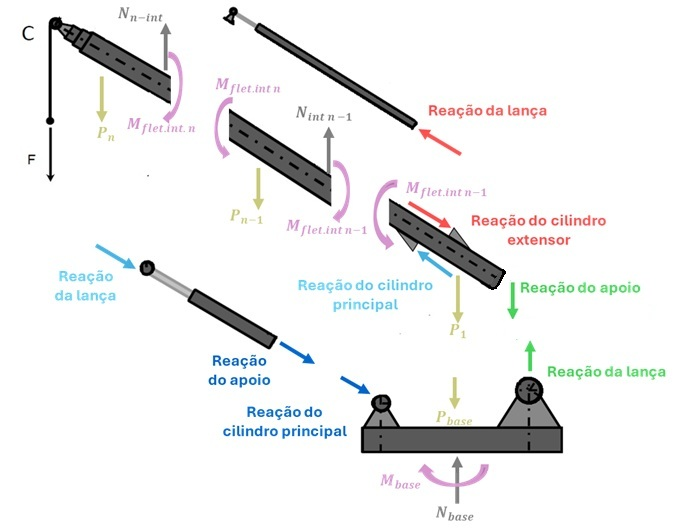

In [62]:

# Inicialização simbólica
sp.init_printing(use_latex='mathjax')

# Definindo variáveis para Mmax- momento maximo, Xgiro -(diatancia do ponto O para o centro de giro)
Mmax, Xgiro = sp.symbols('Mmax Xgiro', real=True)

# Peso P é dado pela massa total da lança multiplicada pela aceleração gravitacional (g)
g = sp.symbols('g', real=True)  # Aceleração gravitacional
L_list = []
# Definir geometria e massa para cada seção
for i in range(N):
    L_list.append(L_i)
    h.append(h_i)
    r.append(r_i)
    e.append(e_i)

    V_i = 2 * h_i * e_i * L_i + (sp.pi * r_i**2 / 2) * L_i + 2 * e_i * r_i * L_i
    V.append(V_i)

    m_i = rho * V_i
    m.append(m_i)

    if i == 0:
        d_i = L_i / 2
    else:
        d_i = L_list[0] + sum(Xl_list[j] for j in range(1, i)) + L_i / 2
    d.append(d_i)

M_total = sum(m)
P = M_total * g

# Fórmula da força máxima
Fmax = (Mmax - P * (Cx_cg - Xgiro)) / ((CX_linha) - Xgiro)

# Exibindo a equação da força máxima em LaTeX
display(sp.Eq(sp.Symbol("F_{max}"), (Fmax)))


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                   ⎛                                                           ↪
                   ⎜                                                           ↪
                   ⎜                                                           ↪
                   ⎜        

In [14]:
from re import L
import pandas as pd
import numpy as np
import sympy as sp
from IPython.display import display, HTML

# --- Função 1: Definir variáveis simbólicas
def definir_variaveis_simbolicas(N):
    Xb, D1, D2, Lb, Mmax, Xgiro, rho, g = sp.symbols('Xb D1 D2 Lb Mmax Xgiro rho g')

    Xl_list, L_list, h, r, e, V, m, d = [], [], [], [], [], [], [], []

    for i in range(N):
        L_i = sp.Symbol(f'Xl{i+1}', real=True, positive=True)
        h_i = sp.Symbol(f'h{i+1}', real=True, positive=True)
        r_i = sp.Symbol(f'r{i+1}', real=True, positive=True)
        e_i = sp.Symbol(f'e{i+1}', real=True, positive=True)

        L_list.append(L_i)
        h.append(h_i)
        r.append(r_i)
        e.append(e_i)

        V_i = 2 * h_i * e_i * L_i + (sp.pi * r_i**2 / 2) * L_i + 2 * e_i * r_i * L_i
        V.append(V_i)

        m_i = rho * V_i
        m.append(m_i)

        if i == 0:
            d_i = L_i / 2
        else:
            d_i = L_list[0] + sum(L_list[j] for j in range(1, i)) + L_i / 2
        d.append(d_i)

    return Xb, D1, D2, Lb, Mmax, Xgiro, rho, g, L_list, h, r, e, V, m, d

# --- Função 2: Calcular ângulo e CG total
def calcular_angulo_e_cg(D1, D2, Lb, Xb, d, m, N):
    AO = sp.sqrt(D1**2 + D2**2)
    alpha = sp.atan(D2 / D1)
    cos_beta = (AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)
    beta = sp.acos(cos_beta)
    theta = beta - alpha

    Cx_i = [d[i] * sp.cos(theta) for i in range(N)]
    M_total = sum(m)
    Cx_cg = sum(m[i] * Cx_i[i] for i in range(N)) / M_total

    return theta, Cx_cg, M_total

# --- Função 3: Calcular força máxima
def calcular_fmax(L_list, theta, Cx_cg, Xgiro, M_total, g, Mmax, N,d):
    Xl = d[i]
    Cx_linha = Xl * sp.cos(theta)
    P = M_total * g
    F_max = (Mmax - P * (Cx_cg - Xgiro)) / (Cx_linha - Xgiro)

    return F_max

# --- Função 4: Gerar tabela para Xb
def gerar_tabela_xb(F_max, L_list, Xb_vals, valores_Xl, N, subs_geom, constantes):
    tabela_fmax = []

    for xb in Xb_vals:
        linha_fmax = []
        for L_total in valores_Xl:
            comp_por_lanca = L_total / N
            subs_lancas = {L_list[i]: comp_por_lanca for i in range(N)}
            subs = {sp.Symbol('Xb'): xb, **subs_lancas, **subs_geom, **constantes}

            resultado_fmax = F_max.subs(subs).evalf()
            linha_fmax.append(round(float(resultado_fmax), 2))

        tabela_fmax.append(linha_fmax)

    return tabela_fmax

# --- Função 5: Visualizar tabela para Xb
def visualizar_tabela_xb(tabela_fmax, valores_Xl, Xb_vals):
    def color_cells(val):
        return 'background-color: green' if val > 0 else 'background-color: red'

    df_fmax_xb = pd.DataFrame(
        tabela_fmax,
        columns=[f'Xl={xl}' for xl in valores_Xl],
        index=[f'Xb={round(xb, 2)}' for xb in Xb_vals]
    )

    df_fmax_xb_styled = (
        df_fmax_xb.style
        .applymap(color_cells)
        .set_table_styles([{'selector': 'th', 'props': [('border', '1px solid black')]},
                           {'selector': 'td', 'props': [('border', '1px solid black')]}])
    )

    title_xb = (
        "<div style='text-align: center; font-family: Arial; font-size: 24px; font-weight: bold;'>"
        "Tabela de Carga da Lança Principal em Função de Xb"
        "</div>"
    )
    subtitle_xb = (
        "<div style='text-align: center; font-family: Arial; font-size: 16px;'>"
        "Tabela de F_max sem coeficiente de segurança (em função de Xb):"
        "</div>"
    )

    display(HTML(title_xb))
    display(HTML(subtitle_xb))
    display(df_fmax_xb_styled)

# --- Código Principal
N = 5
Xb, D1, D2, Lb, Mmax, Xgiro, rho, g, L_list, h, r, e, V, m, d = definir_variaveis_simbolicas(N)
theta, Cx_cg, M_total = calcular_angulo_e_cg(D1, D2, Lb, Xb, d, m, N)
F_max = calcular_fmax(L_list, theta, Cx_cg, Xgiro, M_total, g, Mmax, N, d)

constantes = {
    D1: 3.7,
    D2: 2,
    Lb: 7.5,
    Mmax: 300000,
    Xgiro: 3.7,
    rho: 7800,
    g: 9.81
}

valores_h = [0.65, 0.59]
valores_r = [0.35, 0.29]
for _ in range(N-2):
    valores_h.append(valores_h[-1] * 0.95)
    valores_r.append(valores_r[-1] * 0.95)

valores_Xl = [13, 17.14, 21.28, 25.42, 29.56, 33.7]
valores_L = [valores_Xl[0]]
for i in range(1, len(valores_Xl)):
    valores_L.append(valores_Xl[i] - valores_Xl[i-1])

valores_e = [0.05, 0.03] + [0.03] * 3
subs_geom = {h[i]: valores_h[i] for i in range(N)}
subs_geom.update({r[i]: valores_r[i] for i in range(N)})
subs_geom.update({e[i]: valores_e[i] for i in range(N)})

Xb_vals = np.linspace(4.5, 9.5, 15)

tabela_fmax = gerar_tabela_xb(F_max, L_list, Xb_vals, valores_Xl, N, subs_geom, constantes)
visualizar_tabela_xb(tabela_fmax, valores_Xl, Xb_vals)

<ipython-input-14-11cc3a714eec>:98: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df_fmax_xb_styled = df_fmax_xb.style.applymap(color_cells).set_table_styles(estilos)
<ipython-input-14-11cc3a714eec>:99: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df_fmax_cxlinha_styled = df_fmax_cxlinha.style.applymap(color_cells).set_table_styles(estilos)


In [15]:
#CÓDIGO COM COEFICIENTE DE SEGURANÇA

import pandas as pd
import numpy as np
import sympy as sp
from IPython.display import display, HTML

# --- 1. Definir variáveis simbólicas
Xb, D1, D2, Lb, Mmax, Xgiro, rho, g = sp.symbols('Xb D1 D2 Lb Mmax Xgiro rho g')
N = 5  # Número de lanças

# Listas para armazenar variáveis simbólicas de cada seção
Xl_list, h, r, e = [], [], [], []

# --- 2. Definir variáveis e geometrias
for i in range(N):
    Xl_i = sp.Symbol(f'Xl{i+1}', real=True, positive=True)
    h_i, r_i, e_i = sp.symbols(f'h{i+1} r{i+1} e{i+1}', real=True, positive=True)

    Xl_list.append(Xl_i)
    h.append(h_i)
    r.append(r_i)
    e.append(e_i)

# --- 3. Define volumes and masses
V = [2*h[i]*e[i]*Xl_list[i] + (sp.pi*r[i]**2/2)*Xl_list[i] + 2*e[i]*r[i]*Xl_list[i] for i in range(N)]
m = [rho * V_i for V_i in V]

# --- 4. Centro de gravidade
d = [Xl_list[i]/2 if i==0 else sum(Xl_list[j] for j in range(i)) + Xl_list[i]/2 for i in range(N)]

# --- 5. Ângulo theta
AO = sp.sqrt(D1**2 + D2**2)
theta = sp.acos((AO**2 + Lb**2 - Xb**2) / (2 * AO * Lb)) - sp.atan(D2 / D1)

# --- 6. Cálculo do CG total
M_total = sum(m)
Cx_cg = sum(m[i] * d[i] * sp.cos(theta) for i in range(N)) / M_total
Cz_cg = sum(m[i] * d[i] * sp.sin(theta) for i in range(N)) / M_total

# --- 7. Cx' da ponta da lança e Força máxima
Cx_linha = sum(Xl_list) * sp.cos(theta)
P = M_total * g
F_max = (Mmax - P * (Cx_cg - Xgiro)) / (Cx_linha - Xgiro)

# --- 8. Constantes e Parâmetros com Segurança
constantes = {D1: 3.7, D2: 2, Lb: 7.5, Mmax: 500000, Xgiro: 3.7, rho: 7800, g: 9.81}
valores_h = [0.65, 0.59, 0.59 * 0.95, 0.59 * 0.95**2, 0.59 * 0.95**3]
valores_r = [0.35, 0.29, 0.29 * 0.95, 0.29 * 0.95**2, 0.29 * 0.95**3]
valores_e = [0.05, 0.03, 0.03, 0.03, 0.03]

subs_geom = {h[i]: valores_h[i] for i in range(N)}
subs_geom.update({r[i]: valores_r[i] for i in range(N)})
subs_geom.update({e[i]: valores_e[i] for i in range(N)})

# --- 9. Valores para varredura
valores_Xl = [13, 17.14, 21.28, 25.42, 29.56, 33.7, 37.84, 41.98, 46.12, 50.26, 54.4, 58]
Xb_vals = np.linspace(4.5, 9.5, 10)
CS = 6  # Coeficiente de segurança

# --- 10. Montagem das tabelas
tabela_fmax, valores_cxlinha = [], []

for xb in Xb_vals:
    linha_fmax, cxlinha_linha = [], None
    for L_total in valores_Xl:
        comp_por_lanca = L_total / N
        subs_lancas = {Xl_list[i]: comp_por_lanca for i in range(N)}
        subs = {Xb: xb, **subs_lancas, **subs_geom, **constantes}

        resultado_fmax = F_max.subs(subs).evalf()
        resultado_cxlinha = Cx_linha.subs(subs).evalf()

        cxlinha_linha = cxlinha_linha or float(resultado_cxlinha)
        f_segura = resultado_fmax / CS
        linha_fmax.append(round(float(f_segura), 2))

    tabela_fmax.append(linha_fmax)
    valores_cxlinha.append(round(cxlinha_linha, 2))

# Função para aplicar cor às células
def color_cells(val):
    return 'background-color: green' if val > 0 else 'background-color: red'

# --- 11A. Tabela em função de Xb
df_fmax_xb = pd.DataFrame(tabela_fmax, columns=[f'Xl={xl}' for xl in valores_Xl])
df_fmax_xb.index = [f'Xb={round(xb, 2)}' for xb in Xb_vals]

# --- 11B. Tabela em função de Cx'
df_fmax_cxlinha = pd.DataFrame(tabela_fmax, columns=[f'Xl={xl}' for xl in valores_Xl])
df_fmax_cxlinha.index = [f"Cx'={cx}" for cx in reversed(valores_cxlinha)]

# --- 12. Exibir tabelas com formatação
def exibir_tabela(titulo, subtitulo, df_styled):
    display(HTML(titulo))
    display(HTML(subtitulo))
    display(df_styled)

estilos = [{'selector': 'th', 'props': [('border', '1px solid black')]}, {'selector': 'td', 'props': [('border', '1px solid black')]}]

df_fmax_xb_styled = df_fmax_xb.style.applymap(color_cells).set_table_styles(estilos)
df_fmax_cxlinha_styled = df_fmax_cxlinha.style.applymap(color_cells).set_table_styles(estilos)

# Títulos e subtítulos
title_xb = "<div style='text-align: center; font-family: Arial; font-size: 24px; font-weight: bold;'>Tabela de Carga da Lança Principal em Função de Xb</div>"
subtitle_xb = f"<div style='text-align: center; font-family: Arial; font-size: 16px;'>Tabela de F_max com coeficiente de segurança CS = {CS} (em função de Xb):</div>"
title_cxlinha = "<div style='text-align: center; font-family: Arial; font-size: 24px; font-weight: bold;'>Tabela de Carga da Lança Principal em Função de Cx'</div>"
subtitle_cxlinha = f"<div style='text-align: center; font-family: Arial; font-size: 16px;'>Tabela de F_max com coeficiente de segurança CS = {CS} (em função de Cx'):</div>"

exibir_tabela(title_xb, subtitle_xb, df_fmax_xb_styled)
exibir_tabela(title_cxlinha, subtitle_cxlinha, df_fmax_cxlinha_styled)

# Exibindo a legenda
legend_html = """
<div style='font-family: Arial; font-size: 16px; padding-top: 10px;'>
    <div style='background-color: green; width: 150px; padding: 5px; margin: 5px; display: inline-block;'>
        Operação Permitida
    </div>
    <div style='background-color: red; width: 180px; padding: 5px; margin: 5px; display: inline-block;'>
        Operação Não Permitida
    </div>
</div>
"""
display(HTML(legend_html))

<ipython-input-15-f5b3e090d51b>:101: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df_fmax_xb_styled = df_fmax_xb.style.applymap(color_cells).set_table_styles(estilos)
<ipython-input-15-f5b3e090d51b>:102: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df_fmax_cxlinha_styled = df_fmax_cxlinha.style.applymap(color_cells).set_table_styles(estilos)


ANALISE DE TENSÕES/ DIMENSIONAMENTO

In [67]:
I_seccao, y_cg_list = [], []
N= 12
# --- Função 1: Definir variáveis simbólicas
def definir_variaveis_simbolicas(N):
    Xb, D1, D2, Lb, Mmax, Xgiro, rho, g = sp.symbols('Xb D1 D2 Lb Mmax Xgiro rho g')

    Xl_list, L_list, h, r, e, V, m, d = [], [], [], [], [], [], [], []

    for i in range(N):
        L_i = sp.Symbol(f'Xl{i+1}', real=True, positive=True)
        h_i = sp.Symbol(f'h{i+1}', real=True, positive=True)
        r_i = sp.Symbol(f'r{i+1}', real=True, positive=True)
        e_i = sp.Symbol(f'e{i+1}', real=True, positive=True)

        L_list.append(L_i)
        h.append(h_i)
        r.append(r_i)
        e.append(e_i)

        V_i = 2 * h_i * e_i * L_i + (sp.pi * r_i**2 / 2) * L_i + 2 * e_i * r_i * L_i
        V.append(V_i)

        m_i = rho * V_i
        m.append(m_i)

        if i == 0:
            d_i = L_i / 2
        else:
            d_i = L_list[0] + sum(L_list[j] for j in range(1, i)) + L_i / 2
        d.append(d_i)

    return Xb, D1, D2, Lb, Mmax, Xgiro, rho, g, L_list, h, r, e, V, m, d

for i in range(N):
    # Áreas de cada parte
    A_retang = 2 * h_i * e_i
    A_circ = (sp.pi * r_i**2) / 2

    # Posições dos centróides de cada parte em relação à base
    y_retang = r_i + h_i / 2
    y_circ = (4 * r_i) / (3 * sp.pi)

    # Área total da seção
    A_total = A_retang + A_circ

    # Posição da linha neutra (centroide da seção composta)
    y_cg = (A_retang * y_retang + A_circ * y_circ) / A_total
    y_cg_list.append(sp.simplify(y_cg))

    # Momento de inércia das paredes laterais (2 retângulos)
    I_retang = 2 * ((1/12) * e_i * h_i**3 + e_i * h_i * (y_retang - y_cg)**2)

    # Momento de inércia da semicircunferência (base inferior)
    I_circ_cg = (sp.pi * r_i**4) / 8 - (8 * r_i**4) / (9 * sp.pi)
    I_circ = I_circ_cg + A_circ * (y_circ - y_cg)**2

    # Momento de inércia total da seção
    I_total_i = I_retang + I_circ
    I_seccao.append(sp.simplify(I_total_i))

# Exibir resultados
for i in range(N):
    print(f"Seção {i+1}:")
    display(sp.Eq(sp.Symbol(f'I_seccao_{i+1}'), I_seccao[i]))
    display(sp.Eq(sp.Symbol(f'y_cg_{i+1}'), y_cg_list[i]))
    print("\n")


Seção 1:


                                                            2                  ↪
             -0.000206468550347222⋅π - 5.96132638888888e-5⋅π  - 1.355252715606 ↪
I_seccao_1 = ───────────────────────────────────────────────────────────────── ↪
                                                      ⎛                        ↪
                                                    π⋅⎝0.004225 + 0.0079625⋅π  ↪

↪                               4                         3
↪ 88e-20 + 7.03711059570312e-6⋅π  + 0.000134626383463542⋅π 
↪ ─────────────────────────────────────────────────────────
↪                 2⎞                                       
↪ + 0.0037515625⋅π ⎠                                       

         0.0724583333333333
y_cg_1 = ──────────────────
         0.065 + 0.06125⋅π 



Seção 2:


                                                            2                  ↪
             -0.000206468550347222⋅π - 5.96132638888888e-5⋅π  - 1.355252715606 ↪
I_seccao_2 = ───────────────────────────────────────────────────────────────── ↪
                                                      ⎛                        ↪
                                                    π⋅⎝0.004225 + 0.0079625⋅π  ↪

↪                               4                         3
↪ 88e-20 + 7.03711059570312e-6⋅π  + 0.000134626383463542⋅π 
↪ ─────────────────────────────────────────────────────────
↪                 2⎞                                       
↪ + 0.0037515625⋅π ⎠                                       

         0.0724583333333333
y_cg_2 = ──────────────────
         0.065 + 0.06125⋅π 



Seção 3:


                                                            2                  ↪
             -0.000206468550347222⋅π - 5.96132638888888e-5⋅π  - 1.355252715606 ↪
I_seccao_3 = ───────────────────────────────────────────────────────────────── ↪
                                                      ⎛                        ↪
                                                    π⋅⎝0.004225 + 0.0079625⋅π  ↪

↪                               4                         3
↪ 88e-20 + 7.03711059570312e-6⋅π  + 0.000134626383463542⋅π 
↪ ─────────────────────────────────────────────────────────
↪                 2⎞                                       
↪ + 0.0037515625⋅π ⎠                                       

         0.0724583333333333
y_cg_3 = ──────────────────
         0.065 + 0.06125⋅π 



Seção 4:


                                                            2                  ↪
             -0.000206468550347222⋅π - 5.96132638888888e-5⋅π  - 1.355252715606 ↪
I_seccao_4 = ───────────────────────────────────────────────────────────────── ↪
                                                      ⎛                        ↪
                                                    π⋅⎝0.004225 + 0.0079625⋅π  ↪

↪                               4                         3
↪ 88e-20 + 7.03711059570312e-6⋅π  + 0.000134626383463542⋅π 
↪ ─────────────────────────────────────────────────────────
↪                 2⎞                                       
↪ + 0.0037515625⋅π ⎠                                       

         0.0724583333333333
y_cg_4 = ──────────────────
         0.065 + 0.06125⋅π 



Seção 5:


                                                            2                  ↪
             -0.000206468550347222⋅π - 5.96132638888888e-5⋅π  - 1.355252715606 ↪
I_seccao_5 = ───────────────────────────────────────────────────────────────── ↪
                                                      ⎛                        ↪
                                                    π⋅⎝0.004225 + 0.0079625⋅π  ↪

↪                               4                         3
↪ 88e-20 + 7.03711059570312e-6⋅π  + 0.000134626383463542⋅π 
↪ ─────────────────────────────────────────────────────────
↪                 2⎞                                       
↪ + 0.0037515625⋅π ⎠                                       

         0.0724583333333333
y_cg_5 = ──────────────────
         0.065 + 0.06125⋅π 



Seção 6:


                                                            2                  ↪
             -0.000206468550347222⋅π - 5.96132638888888e-5⋅π  - 1.355252715606 ↪
I_seccao_6 = ───────────────────────────────────────────────────────────────── ↪
                                                      ⎛                        ↪
                                                    π⋅⎝0.004225 + 0.0079625⋅π  ↪

↪                               4                         3
↪ 88e-20 + 7.03711059570312e-6⋅π  + 0.000134626383463542⋅π 
↪ ─────────────────────────────────────────────────────────
↪                 2⎞                                       
↪ + 0.0037515625⋅π ⎠                                       

         0.0724583333333333
y_cg_6 = ──────────────────
         0.065 + 0.06125⋅π 



Seção 7:


                                                            2                  ↪
             -0.000206468550347222⋅π - 5.96132638888888e-5⋅π  - 1.355252715606 ↪
I_seccao_7 = ───────────────────────────────────────────────────────────────── ↪
                                                      ⎛                        ↪
                                                    π⋅⎝0.004225 + 0.0079625⋅π  ↪

↪                               4                         3
↪ 88e-20 + 7.03711059570312e-6⋅π  + 0.000134626383463542⋅π 
↪ ─────────────────────────────────────────────────────────
↪                 2⎞                                       
↪ + 0.0037515625⋅π ⎠                                       

         0.0724583333333333
y_cg_7 = ──────────────────
         0.065 + 0.06125⋅π 



Seção 8:


                                                            2                  ↪
             -0.000206468550347222⋅π - 5.96132638888888e-5⋅π  - 1.355252715606 ↪
I_seccao_8 = ───────────────────────────────────────────────────────────────── ↪
                                                      ⎛                        ↪
                                                    π⋅⎝0.004225 + 0.0079625⋅π  ↪

↪                               4                         3
↪ 88e-20 + 7.03711059570312e-6⋅π  + 0.000134626383463542⋅π 
↪ ─────────────────────────────────────────────────────────
↪                 2⎞                                       
↪ + 0.0037515625⋅π ⎠                                       

         0.0724583333333333
y_cg_8 = ──────────────────
         0.065 + 0.06125⋅π 



Seção 9:


                                                            2                  ↪
             -0.000206468550347222⋅π - 5.96132638888888e-5⋅π  - 1.355252715606 ↪
I_seccao_9 = ───────────────────────────────────────────────────────────────── ↪
                                                      ⎛                        ↪
                                                    π⋅⎝0.004225 + 0.0079625⋅π  ↪

↪                               4                         3
↪ 88e-20 + 7.03711059570312e-6⋅π  + 0.000134626383463542⋅π 
↪ ─────────────────────────────────────────────────────────
↪                 2⎞                                       
↪ + 0.0037515625⋅π ⎠                                       

         0.0724583333333333
y_cg_9 = ──────────────────
         0.065 + 0.06125⋅π 



Seção 10:


                                                             2                 ↪
              -0.000206468550347222⋅π - 5.96132638888888e-5⋅π  - 1.35525271560 ↪
I_seccao_10 = ──────────────────────────────────────────────────────────────── ↪
                                                       ⎛                       ↪
                                                     π⋅⎝0.004225 + 0.0079625⋅π ↪

↪                                4                         3
↪ 688e-20 + 7.03711059570312e-6⋅π  + 0.000134626383463542⋅π 
↪ ──────────────────────────────────────────────────────────
↪                  2⎞                                       
↪  + 0.0037515625⋅π ⎠                                       

          0.0724583333333333
y_cg_10 = ──────────────────
          0.065 + 0.06125⋅π 



Seção 11:


                                                             2                 ↪
              -0.000206468550347222⋅π - 5.96132638888888e-5⋅π  - 1.35525271560 ↪
I_seccao_11 = ──────────────────────────────────────────────────────────────── ↪
                                                       ⎛                       ↪
                                                     π⋅⎝0.004225 + 0.0079625⋅π ↪

↪                                4                         3
↪ 688e-20 + 7.03711059570312e-6⋅π  + 0.000134626383463542⋅π 
↪ ──────────────────────────────────────────────────────────
↪                  2⎞                                       
↪  + 0.0037515625⋅π ⎠                                       

          0.0724583333333333
y_cg_11 = ──────────────────
          0.065 + 0.06125⋅π 



Seção 12:


                                                             2                 ↪
              -0.000206468550347222⋅π - 5.96132638888888e-5⋅π  - 1.35525271560 ↪
I_seccao_12 = ──────────────────────────────────────────────────────────────── ↪
                                                       ⎛                       ↪
                                                     π⋅⎝0.004225 + 0.0079625⋅π ↪

↪                                4                         3
↪ 688e-20 + 7.03711059570312e-6⋅π  + 0.000134626383463542⋅π 
↪ ──────────────────────────────────────────────────────────
↪                  2⎞                                       
↪  + 0.0037515625⋅π ⎠                                       

          0.0724583333333333
y_cg_12 = ──────────────────
          0.065 + 0.06125⋅π 

In [68]:
# Variável simbólica para comprimento total da lança
X_l = sp.Symbol('X_l', real=True, positive=True)

# Definição das variáveis gerais
P = [sp.Symbol(f'P_{i+1}', real=True, positive=True) for i in range(N)]  # Pesos próprios
L = [sp.Symbol(f'L_{i+1}', real=True, positive=True) for i in range(N)]  # Comprimentos das seções


# Função para cálculo do momento fletor na seção n
def calcular_M(n):
    M = 0

    # Braço da força F_C: distância da seção n até a extremidade da lança (usando X_l como variável simbólica)

    braco_F = X_l - sum(L[i] for i in range(n-1))
    M += Fmax * braco_F * sp.cos(theta)

    # Braços dos pesos próprios P_i
    for i in range(n-1, N):
        if i == n-1:
            braco_P = L[i] / 2
        else:
            braco_P = sum(L[j] for j in range(n-1, i)) + L[i] / 2
        M += P[i] * braco_P * sp.cos(theta)

    return M

# Função para cálculo da tensão na seção n
def calcular_tensao(n):
    M_n = calcular_M(n)
    return M_n * y_cg_list[n-1] / I_seccao[n-1]

# Cálculo e exibição das tensões sigma_i
for i in range(N, 0, -1):
    sigma_i = calcular_tensao(i)
    display(Math(f"\\sigma_{{{i}}} = {sp.latex((sigma_i))}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [70]:
#PRIMEIRO MOMENTO DE ÁREA


# Listas para armazenar variáveis e resultados
y_cg_list, Q_seccao = [], []

# Função para calcular y_cg e Q para uma seção
def calcular_cg_Q(h_i, r_i, e_i):
    # Áreas
    A_retang_laterais = 2 * h_i * e_i
    A_circ = (sp.pi * r_i**2) / 2
    A_retang_superior = 2 * r_i * e_i

    # Posições dos centroides (medidos a partir da base)
    y_retang_laterais = r_i + h_i / 2
    y_circ = (4 * r_i) / (3 * sp.pi)
    y_retang_superior = r_i + h_i + e_i / 2

    # Área total
    A_total = A_retang_laterais + A_circ + A_retang_superior

    # Centroide total y_cg
    y_cg = (A_retang_laterais * y_retang_laterais +
            A_circ * y_circ +
            A_retang_superior * y_retang_superior) / A_total

    # Primeiro momento de área Q (acima de y_cg)
    Q_laterais = A_retang_laterais * sp.Max(y_retang_laterais - y_cg, 0)
    Q_superior = A_retang_superior * sp.Max(y_retang_superior - y_cg, 0)
    Q_circ = A_circ * sp.Max(y_cg - y_circ, 0)  # se o y_cg estiver acima do centro da semicircunferência

    Q_total = Q_laterais + Q_superior + Q_circ

    return sp.simplify(y_cg), sp.simplify(Q_total)

# Loop para criar as variáveis simbólicas e calcular os valores
for i in range(N):
    h_i = sp.Symbol(f'h{i+1}', real=True, positive=True)
    r_i = sp.Symbol(f'r{i+1}', real=True, positive=True)
    e_i = sp.Symbol(f'e{i+1}', real=True, positive=True)

    h.append(h_i)
    r.append(r_i)
    e.append(e_i)

    ycg_i, Q_i = calcular_cg_Q(h_i, r_i, e_i)
    y_cg_list.append(ycg_i)
    Q_seccao.append(Q_i)

# Exibir os resultados simbólicos
for i in range(N):
    display(sp.Eq(sp.Symbol(f"y_cg_{i+1}"), y_cg_list[i]))
    display(sp.Eq(sp.Symbol(f"Q_{i+1}"), Q_seccao[i]))


           ⎛                                                       3⎞
         2⋅⎝3⋅e₁⋅h₁⋅(h₁ + 2⋅r₁) + 3⋅e₁⋅r₁⋅(e₁ + 2⋅h₁ + 2⋅r₁) + 2⋅r₁ ⎠
y_cg_1 = ────────────────────────────────────────────────────────────
                          ⎛                        2⎞                
                        3⋅⎝4⋅e₁⋅h₁ + 4⋅e₁⋅r₁ + π⋅r₁ ⎠                

                                                                               ↪
                                                                               ↪
Q₁ = 2⋅e₁⋅h₁⋅Max(0, r1*(-12*e1**2 - 12*e1*h1 + 3*pi*h1*r1 - 8*r1**2 + 6*pi*r1* ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ *2)/(6*(4*e1*h1 + 4*e1*r1 + pi*r1**2))) + 2⋅e₁⋅r₁⋅Max(0, (12*e1**2*h1 + 12*e ↪
↪                                                                              ↪

↪                                                                              ↪
↪                                                                              ↪
↪ 1*h1**2 + 3*pi*e1*r1**2 + 6*pi*h1*r1**2 - 8*r1**3 + 6*pi*r1**3)/(6*(4*e1*h1  ↪
↪                                                                              ↪

↪                        

           ⎛                                                       3⎞
         2⋅⎝3⋅e₂⋅h₂⋅(h₂ + 2⋅r₂) + 3⋅e₂⋅r₂⋅(e₂ + 2⋅h₂ + 2⋅r₂) + 2⋅r₂ ⎠
y_cg_2 = ────────────────────────────────────────────────────────────
                          ⎛                        2⎞                
                        3⋅⎝4⋅e₂⋅h₂ + 4⋅e₂⋅r₂ + π⋅r₂ ⎠                

                                                                               ↪
                                                                               ↪
Q₂ = 2⋅e₂⋅h₂⋅Max(0, r2*(-12*e2**2 - 12*e2*h2 + 3*pi*h2*r2 - 8*r2**2 + 6*pi*r2* ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ *2)/(6*(4*e2*h2 + 4*e2*r2 + pi*r2**2))) + 2⋅e₂⋅r₂⋅Max(0, (12*e2**2*h2 + 12*e ↪
↪                                                                              ↪

↪                                                                              ↪
↪                                                                              ↪
↪ 2*h2**2 + 3*pi*e2*r2**2 + 6*pi*h2*r2**2 - 8*r2**3 + 6*pi*r2**3)/(6*(4*e2*h2  ↪
↪                                                                              ↪

↪                        

           ⎛                                                       3⎞
         2⋅⎝3⋅e₃⋅h₃⋅(h₃ + 2⋅r₃) + 3⋅e₃⋅r₃⋅(e₃ + 2⋅h₃ + 2⋅r₃) + 2⋅r₃ ⎠
y_cg_3 = ────────────────────────────────────────────────────────────
                          ⎛                        2⎞                
                        3⋅⎝4⋅e₃⋅h₃ + 4⋅e₃⋅r₃ + π⋅r₃ ⎠                

                                                                               ↪
                                                                               ↪
Q₃ = 2⋅e₃⋅h₃⋅Max(0, r3*(-12*e3**2 - 12*e3*h3 + 3*pi*h3*r3 - 8*r3**2 + 6*pi*r3* ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ *2)/(6*(4*e3*h3 + 4*e3*r3 + pi*r3**2))) + 2⋅e₃⋅r₃⋅Max(0, (12*e3**2*h3 + 12*e ↪
↪                                                                              ↪

↪                                                                              ↪
↪                                                                              ↪
↪ 3*h3**2 + 3*pi*e3*r3**2 + 6*pi*h3*r3**2 - 8*r3**3 + 6*pi*r3**3)/(6*(4*e3*h3  ↪
↪                                                                              ↪

↪                        

           ⎛                                                       3⎞
         2⋅⎝3⋅e₄⋅h₄⋅(h₄ + 2⋅r₄) + 3⋅e₄⋅r₄⋅(e₄ + 2⋅h₄ + 2⋅r₄) + 2⋅r₄ ⎠
y_cg_4 = ────────────────────────────────────────────────────────────
                          ⎛                        2⎞                
                        3⋅⎝4⋅e₄⋅h₄ + 4⋅e₄⋅r₄ + π⋅r₄ ⎠                

                                                                               ↪
                                                                               ↪
Q₄ = 2⋅e₄⋅h₄⋅Max(0, r4*(-12*e4**2 - 12*e4*h4 + 3*pi*h4*r4 - 8*r4**2 + 6*pi*r4* ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ *2)/(6*(4*e4*h4 + 4*e4*r4 + pi*r4**2))) + 2⋅e₄⋅r₄⋅Max(0, (12*e4**2*h4 + 12*e ↪
↪                                                                              ↪

↪                                                                              ↪
↪                                                                              ↪
↪ 4*h4**2 + 3*pi*e4*r4**2 + 6*pi*h4*r4**2 - 8*r4**3 + 6*pi*r4**3)/(6*(4*e4*h4  ↪
↪                                                                              ↪

↪                        

           ⎛                                                       3⎞
         2⋅⎝3⋅e₅⋅h₅⋅(h₅ + 2⋅r₅) + 3⋅e₅⋅r₅⋅(e₅ + 2⋅h₅ + 2⋅r₅) + 2⋅r₅ ⎠
y_cg_5 = ────────────────────────────────────────────────────────────
                          ⎛                        2⎞                
                        3⋅⎝4⋅e₅⋅h₅ + 4⋅e₅⋅r₅ + π⋅r₅ ⎠                

                                                                               ↪
                                                                               ↪
Q₅ = 2⋅e₅⋅h₅⋅Max(0, r5*(-12*e5**2 - 12*e5*h5 + 3*pi*h5*r5 - 8*r5**2 + 6*pi*r5* ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ *2)/(6*(4*e5*h5 + 4*e5*r5 + pi*r5**2))) + 2⋅e₅⋅r₅⋅Max(0, (12*e5**2*h5 + 12*e ↪
↪                                                                              ↪

↪                                                                              ↪
↪                                                                              ↪
↪ 5*h5**2 + 3*pi*e5*r5**2 + 6*pi*h5*r5**2 - 8*r5**3 + 6*pi*r5**3)/(6*(4*e5*h5  ↪
↪                                                                              ↪

↪                        

           ⎛                                                       3⎞
         2⋅⎝3⋅e₆⋅h₆⋅(h₆ + 2⋅r₆) + 3⋅e₆⋅r₆⋅(e₆ + 2⋅h₆ + 2⋅r₆) + 2⋅r₆ ⎠
y_cg_6 = ────────────────────────────────────────────────────────────
                          ⎛                        2⎞                
                        3⋅⎝4⋅e₆⋅h₆ + 4⋅e₆⋅r₆ + π⋅r₆ ⎠                

                                                                               ↪
                                                                               ↪
Q₆ = 2⋅e₆⋅h₆⋅Max(0, r6*(-12*e6**2 - 12*e6*h6 + 3*pi*h6*r6 - 8*r6**2 + 6*pi*r6* ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ *2)/(6*(4*e6*h6 + 4*e6*r6 + pi*r6**2))) + 2⋅e₆⋅r₆⋅Max(0, (12*e6**2*h6 + 12*e ↪
↪                                                                              ↪

↪                                                                              ↪
↪                                                                              ↪
↪ 6*h6**2 + 3*pi*e6*r6**2 + 6*pi*h6*r6**2 - 8*r6**3 + 6*pi*r6**3)/(6*(4*e6*h6  ↪
↪                                                                              ↪

↪                        

           ⎛                                                       3⎞
         2⋅⎝3⋅e₇⋅h₇⋅(h₇ + 2⋅r₇) + 3⋅e₇⋅r₇⋅(e₇ + 2⋅h₇ + 2⋅r₇) + 2⋅r₇ ⎠
y_cg_7 = ────────────────────────────────────────────────────────────
                          ⎛                        2⎞                
                        3⋅⎝4⋅e₇⋅h₇ + 4⋅e₇⋅r₇ + π⋅r₇ ⎠                

                                                                               ↪
                                                                               ↪
Q₇ = 2⋅e₇⋅h₇⋅Max(0, r7*(-12*e7**2 - 12*e7*h7 + 3*pi*h7*r7 - 8*r7**2 + 6*pi*r7* ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ *2)/(6*(4*e7*h7 + 4*e7*r7 + pi*r7**2))) + 2⋅e₇⋅r₇⋅Max(0, (12*e7**2*h7 + 12*e ↪
↪                                                                              ↪

↪                                                                              ↪
↪                                                                              ↪
↪ 7*h7**2 + 3*pi*e7*r7**2 + 6*pi*h7*r7**2 - 8*r7**3 + 6*pi*r7**3)/(6*(4*e7*h7  ↪
↪                                                                              ↪

↪                        

           ⎛                                                       3⎞
         2⋅⎝3⋅e₈⋅h₈⋅(h₈ + 2⋅r₈) + 3⋅e₈⋅r₈⋅(e₈ + 2⋅h₈ + 2⋅r₈) + 2⋅r₈ ⎠
y_cg_8 = ────────────────────────────────────────────────────────────
                          ⎛                        2⎞                
                        3⋅⎝4⋅e₈⋅h₈ + 4⋅e₈⋅r₈ + π⋅r₈ ⎠                

                                                                               ↪
                                                                               ↪
Q₈ = 2⋅e₈⋅h₈⋅Max(0, r8*(-12*e8**2 - 12*e8*h8 + 3*pi*h8*r8 - 8*r8**2 + 6*pi*r8* ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ *2)/(6*(4*e8*h8 + 4*e8*r8 + pi*r8**2))) + 2⋅e₈⋅r₈⋅Max(0, (12*e8**2*h8 + 12*e ↪
↪                                                                              ↪

↪                                                                              ↪
↪                                                                              ↪
↪ 8*h8**2 + 3*pi*e8*r8**2 + 6*pi*h8*r8**2 - 8*r8**3 + 6*pi*r8**3)/(6*(4*e8*h8  ↪
↪                                                                              ↪

↪                        

           ⎛                                                       3⎞
         2⋅⎝3⋅e₉⋅h₉⋅(h₉ + 2⋅r₉) + 3⋅e₉⋅r₉⋅(e₉ + 2⋅h₉ + 2⋅r₉) + 2⋅r₉ ⎠
y_cg_9 = ────────────────────────────────────────────────────────────
                          ⎛                        2⎞                
                        3⋅⎝4⋅e₉⋅h₉ + 4⋅e₉⋅r₉ + π⋅r₉ ⎠                

                                                                               ↪
                                                                               ↪
Q₉ = 2⋅e₉⋅h₉⋅Max(0, r9*(-12*e9**2 - 12*e9*h9 + 3*pi*h9*r9 - 8*r9**2 + 6*pi*r9* ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ *2)/(6*(4*e9*h9 + 4*e9*r9 + pi*r9**2))) + 2⋅e₉⋅r₉⋅Max(0, (12*e9**2*h9 + 12*e ↪
↪                                                                              ↪

↪                                                                              ↪
↪                                                                              ↪
↪ 9*h9**2 + 3*pi*e9*r9**2 + 6*pi*h9*r9**2 - 8*r9**3 + 6*pi*r9**3)/(6*(4*e9*h9  ↪
↪                                                                              ↪

↪                        

            ⎛                                                                 3⎞
          2⋅⎝3⋅e₁₀⋅h₁₀⋅(h₁₀ + 2⋅r₁₀) + 3⋅e₁₀⋅r₁₀⋅(e₁₀ + 2⋅h₁₀ + 2⋅r₁₀) + 2⋅r₁₀ ⎠
y_cg_10 = ──────────────────────────────────────────────────────────────────────
                              ⎛                             2⎞                  
                            3⋅⎝4⋅e₁₀⋅h₁₀ + 4⋅e₁₀⋅r₁₀ + π⋅r₁₀ ⎠                  

                                                                               ↪
                                                                               ↪
Q₁₀ = 2⋅e₁₀⋅h₁₀⋅Max(0, r10*(-12*e10**2 - 12*e10*h10 + 3*pi*h10*r10 - 8*r10**2  ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ + 6*pi*r10**2)/(6*(4*e10*h10 + 4*e10*r10 + pi*r10**2))) + 2⋅e₁₀⋅r₁₀⋅Max(0, ( ↪
↪                                                                              ↪

↪                                                                              ↪
↪                                                                              ↪
↪ 12*e10**2*h10 + 12*e10*h10**2 + 3*pi*e10*r10**2 + 6*pi*h10*r10**2 - 8*r10**3 ↪
↪                                                                              ↪

↪                        

            ⎛                                                                 3⎞
          2⋅⎝3⋅e₁₁⋅h₁₁⋅(h₁₁ + 2⋅r₁₁) + 3⋅e₁₁⋅r₁₁⋅(e₁₁ + 2⋅h₁₁ + 2⋅r₁₁) + 2⋅r₁₁ ⎠
y_cg_11 = ──────────────────────────────────────────────────────────────────────
                              ⎛                             2⎞                  
                            3⋅⎝4⋅e₁₁⋅h₁₁ + 4⋅e₁₁⋅r₁₁ + π⋅r₁₁ ⎠                  

                                                                               ↪
                                                                               ↪
Q₁₁ = 2⋅e₁₁⋅h₁₁⋅Max(0, r11*(-12*e11**2 - 12*e11*h11 + 3*pi*h11*r11 - 8*r11**2  ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ + 6*pi*r11**2)/(6*(4*e11*h11 + 4*e11*r11 + pi*r11**2))) + 2⋅e₁₁⋅r₁₁⋅Max(0, ( ↪
↪                                                                              ↪

↪                                                                              ↪
↪                                                                              ↪
↪ 12*e11**2*h11 + 12*e11*h11**2 + 3*pi*e11*r11**2 + 6*pi*h11*r11**2 - 8*r11**3 ↪
↪                                                                              ↪

↪                        

            ⎛                                                                 3⎞
          2⋅⎝3⋅e₁₂⋅h₁₂⋅(h₁₂ + 2⋅r₁₂) + 3⋅e₁₂⋅r₁₂⋅(e₁₂ + 2⋅h₁₂ + 2⋅r₁₂) + 2⋅r₁₂ ⎠
y_cg_12 = ──────────────────────────────────────────────────────────────────────
                              ⎛                             2⎞                  
                            3⋅⎝4⋅e₁₂⋅h₁₂ + 4⋅e₁₂⋅r₁₂ + π⋅r₁₂ ⎠                  

                                                                               ↪
                                                                               ↪
Q₁₂ = 2⋅e₁₂⋅h₁₂⋅Max(0, r12*(-12*e12**2 - 12*e12*h12 + 3*pi*h12*r12 - 8*r12**2  ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ + 6*pi*r12**2)/(6*(4*e12*h12 + 4*e12*r12 + pi*r12**2))) + 2⋅e₁₂⋅r₁₂⋅Max(0, ( ↪
↪                                                                              ↪

↪                                                                              ↪
↪                                                                              ↪
↪ 12*e12**2*h12 + 12*e12*h12**2 + 3*pi*e12*r12**2 + 6*pi*h12*r12**2 - 8*r12**3 ↪
↪                                                                              ↪

↪                        

In [71]:

# Função simbólica para calcular o esforço cortante na seção n
def calcular_cortante(n):
    Vn = Fmax * sp.cos(theta)
    for i in range(n-1, N):
        Vn += P[i] * sp.cos(theta)
    return (Vn)

# Exibir o esforço cortante simbólico em cada seção
for i in range(N, 0, -1):
    V_i = calcular_cortante(i)
    display(sp.Eq(sp.Symbol(f"V_{i}"), V_i))
    print(" ----------------------------------------------------------------------------------------------------------")


                                                        ⎛                      ↪
                                                        ⎜                      ↪
                                                        ⎜                      ↪
                                                        ⎜                      ↪
                                                        ⎜                      ↪
                                                        ⎜                      ↪
                                                        ⎜                      ↪
                                                        ⎜                      ↪
                                                        ⎜                      ↪
                                                        ⎜         ⎛            ↪
                                                        ⎜         ⎜            ↪
                                                        ⎜         ⎜            ↪
                            

 ----------------------------------------------------------------------------------------------------------


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                            

 ----------------------------------------------------------------------------------------------------------


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                            

 ----------------------------------------------------------------------------------------------------------


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                            

 ----------------------------------------------------------------------------------------------------------


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                            

 ----------------------------------------------------------------------------------------------------------


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                            

 ----------------------------------------------------------------------------------------------------------


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                            

 ----------------------------------------------------------------------------------------------------------


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                            

 ----------------------------------------------------------------------------------------------------------


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                            

 ----------------------------------------------------------------------------------------------------------


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                            

 ----------------------------------------------------------------------------------------------------------


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                            

 ----------------------------------------------------------------------------------------------------------


                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                            

 ----------------------------------------------------------------------------------------------------------


In [72]:
# --- Cálculo da tensão de cisalhamento

# Função para calcular a tensão de cisalhamento na seção n
def calcular_tensao_cisalhamento(n):
    V_n = calcular_cortante(n)  # Calcula o esforço cortante na seção n
    Q_n = Q_seccao[n-1]         # Primeiro momento de área na seção n
    I_n = I_seccao[n-1]          # Momento de inércia na seção n
    t = 2 * e[n-1]              # Espessura da parede (2 paredes)

    tau_n = V_n * Q_n / (I_n * t)  # Fórmula da tensão de cisalhamento
    return tau_n

# Exibir as tensões de cisalhamento em cada seção
for i in range(N, 0, -1):
    tau_i = calcular_tensao_cisalhamento(i)
    display(Math(f"\\tau_{{{i}}} = {sp.latex(tau_i)}"))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [73]:
# Função para calcular a tensão de Von Mises
def calcular_von_mises(sigma, tau):
    return sp.sqrt(sigma**2 + 3 * tau**2)

# Cálculo das tensões de von Mises para cada seção
for i in range(N, 0, -1):
    sigma_i = calcular_tensao(i)  # função que você já tem
    tau_i = calcular_tensao_cisalhamento(i)  # função que você já tem
    von_mises_i = calcular_von_mises(sigma_i, tau_i)

    display(Math(f"\\sigma_{{vm_{i}}} = {sp.latex(von_mises_i)}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [22]:
#DIMENSIONAMENTO DA LANÇA, SEM SUBSTITUIR A FORÇA MÁXIMA"
import sympy as sp
from IPython.display import display

# Constantes e variáveis simbólicas
N = 5  # Número de lanças
sigma_permitida_value = 345  # MPa
S_value = 6  # Coeficiente de segurança

# Variáveis geométricas e físicas
F_max = sp.Symbol('F_max', real=True, positive=True)
h = [sp.Symbol(f'h{i+1}', real=True, positive=True) for i in range(N)]
r = [sp.Symbol(f'r{i+1}', real=True, positive=True) for i in range(N)]
e = [sp.Symbol(f'e{i+1}', real=True, positive=True) for i in range(N)]

# Expressão para área necessária
A_necessaria = F_max / (sigma_permitida_value * S_value)

# Cálculo direto da área total e resolução das dimensões
for i in range(N):
    # Área de seção composta
    A_rect_laterais = 2 * h[i] * e[i]
    A_circ = (sp.pi * r[i]**2) / 2
    A_rect_superior = 2 * r[i] * e[i]

    # Área total
    A_total = A_rect_laterais + A_circ + A_rect_superior

    # Equações para resolver h, r, e diretamente com A_necessaria conhecido
    try:
        h_expr = sp.solve(sp.Eq(A_total, A_necessaria), h[i])[0]
        display(sp.Eq(h[i], sp.simplify(h_expr)))
    except:
        display(f"Não é possível resolver simbolicamente para h[{i}]")

    try:
        r_expr = sp.solve(sp.Eq(A_total, A_necessaria), r[i])[0]
        display(sp.Eq(r[i], sp.simplify(r_expr)))
    except:
        display(f"Não é possível resolver simbolicamente para r[{i}]")

    try:
        e_expr = sp.solve(sp.Eq(A_total, A_necessaria), e[i])[0]
        display(sp.Eq(e[i], sp.simplify(e_expr)))
    except:
        display(f"Não é possível resolver simbolicamente para e[{i}]")

                        2
     Fₘₐₓ           π⋅r₁ 
     ──── - e₁⋅r₁ - ─────
     4140             4  
h₁ = ────────────────────
              e₁         

                __________________________________________
               ╱                       2                  
             ╲╱  115⋅π⋅Fₘₐₓ + 476100⋅e₁  - 476100⋅π⋅e₁⋅h₁ 
     -2⋅e₁ - ─────────────────────────────────────────────
                                  345                     
r₁ = ─────────────────────────────────────────────────────
                               π                          

                2
     Fₘₐₓ   π⋅r₁ 
     ──── - ─────
     4140     4  
e₁ = ────────────
       h₁ + r₁   

                        2
     Fₘₐₓ           π⋅r₂ 
     ──── - e₂⋅r₂ - ─────
     4140             4  
h₂ = ────────────────────
              e₂         

                __________________________________________
               ╱                       2                  
             ╲╱  115⋅π⋅Fₘₐₓ + 476100⋅e₂  - 476100⋅π⋅e₂⋅h₂ 
     -2⋅e₂ - ─────────────────────────────────────────────
                                  345                     
r₂ = ─────────────────────────────────────────────────────
                               π                          

                2
     Fₘₐₓ   π⋅r₂ 
     ──── - ─────
     4140     4  
e₂ = ────────────
       h₂ + r₂   

                        2
     Fₘₐₓ           π⋅r₃ 
     ──── - e₃⋅r₃ - ─────
     4140             4  
h₃ = ────────────────────
              e₃         

                __________________________________________
               ╱                       2                  
             ╲╱  115⋅π⋅Fₘₐₓ + 476100⋅e₃  - 476100⋅π⋅e₃⋅h₃ 
     -2⋅e₃ - ─────────────────────────────────────────────
                                  345                     
r₃ = ─────────────────────────────────────────────────────
                               π                          

                2
     Fₘₐₓ   π⋅r₃ 
     ──── - ─────
     4140     4  
e₃ = ────────────
       h₃ + r₃   

                        2
     Fₘₐₓ           π⋅r₄ 
     ──── - e₄⋅r₄ - ─────
     4140             4  
h₄ = ────────────────────
              e₄         

                __________________________________________
               ╱                       2                  
             ╲╱  115⋅π⋅Fₘₐₓ + 476100⋅e₄  - 476100⋅π⋅e₄⋅h₄ 
     -2⋅e₄ - ─────────────────────────────────────────────
                                  345                     
r₄ = ─────────────────────────────────────────────────────
                               π                          

                2
     Fₘₐₓ   π⋅r₄ 
     ──── - ─────
     4140     4  
e₄ = ────────────
       h₄ + r₄   

                        2
     Fₘₐₓ           π⋅r₅ 
     ──── - e₅⋅r₅ - ─────
     4140             4  
h₅ = ────────────────────
              e₅         

                __________________________________________
               ╱                       2                  
             ╲╱  115⋅π⋅Fₘₐₓ + 476100⋅e₅  - 476100⋅π⋅e₅⋅h₅ 
     -2⋅e₅ - ─────────────────────────────────────────────
                                  345                     
r₅ = ─────────────────────────────────────────────────────
                               π                          

                2
     Fₘₐₓ   π⋅r₅ 
     ──── - ─────
     4140     4  
e₅ = ────────────
       h₅ + r₅   

In [23]:
#CÓDIGO SUBSITUINDO A FORÇA MÁXIMA"

import sympy as sp
from IPython.display import display

# Inicialização simbólica para design de equações
sp.init_printing(use_latex='mathjax')

# Número de lanças
N = 5

# Variáveis e constantes simbólicas para o cálculo de Fmax
Mmax, Xgiro, g, rho, Cx_cg, Cx_linha = sp.symbols('Mmax Xgiro g rho Cx_cg Cx_linha', real=True)

# Variáveis simbólicas de dimensões para cálculo de Fmax
Xl_i, h_i, r_i, e_i = sp.symbols('Xl_i h_i r_i e_i', real=True, positive=True)

V = []
m = []
d = []

# Definindo a geometria e massa para cada seção
Xl_list = [Xl_i]  # Exemplo inicial, adaptar conforme necessário

for i in range(N):
    V_i = 2 * h_i * e_i * Xl_i + (sp.pi * r_i**2 / 2) * Xl_i + 2 * e_i * r_i * Xl_i
    V.append(V_i)

    m_i = rho * V_i
    m.append(m_i)

    if i == 0:
        d_i = Xl_i / 2
    else:
        d_i = Xl_list[0] + sum(Xl_i for _ in range(1, i)) + Xl_i / 2
    d.append(d_i)

M_total = sum(m)
P = M_total * g

# Fórmula da força máxima
F_max = (Mmax - P * (Cx_cg - Xgiro)) / (Cx_linha - Xgiro)

# Exibindo a equação da força máxima em LaTeX
display(sp.Eq(sp.Symbol("F_{max}"), F_max))

# Constantes conhecidas
sigma_permitida_value = 345  # Pa
S_value = 6

# Dimensões para cálculo das áreas
h = [sp.Symbol(f'h{i+1}', real=True, positive=True) for i in range(N)]
r = [sp.Symbol(f'r{i+1}', real=True, positive=True) for i in range(N)]
e = [sp.Symbol(f'e{i+1}', real=True, positive=True) for i in range(N)]

# Cálculo de A_target com F_max do cálculo anterior
A_target_value = F_max / (sigma_permitida_value * S_value)

# Cálculo da área de cada componente e resolução para as variáveis
for i in range(N):
    # Área de seção composta: laterais + semicircunferência + parte superior
    A_rect_laterais = 2 * h[i] * e[i]
    A_circ = (sp.pi * r[i]**2) / 2
    A_rect_superior = 2 * r[i] * e[i]

    # Área total
    A_total = A_rect_laterais + A_circ + A_rect_superior

    # Equações para resolver h, r, e com A_target_value
    try:
        h_expr = sp.solve(sp.Eq(A_total, A_target_value), h[i])[0]
        display(sp.Eq(h[i], sp.simplify(h_expr)))
    except:
        display(f"Não é possível resolver simbolicamente por h[{i}]")

    try:
        r_expr = sp.solve(sp.Eq(A_total, A_target_value), r[i])[0]
        display(sp.Eq(r[i], sp.simplify(r_expr)))
    except:
        display(f"Não é possível resolver simbolicamente por r[{i}]")

    try:
        e_expr = sp.solve(sp.Eq(A_total, A_target_value), e[i])[0]
        display(sp.Eq(e[i], sp.simplify(e_expr)))
    except:
        display(f"Não é possível resolver simbolicamente por e[{i}]")

                                       ⎛                                    2⎞
                                       ⎜                            π⋅Xlᵢ⋅rᵢ ⎟
          Mmax - 5⋅g⋅ρ⋅(Cx_cg - Xgiro)⋅⎜2⋅Xlᵢ⋅eᵢ⋅hᵢ + 2⋅Xlᵢ⋅eᵢ⋅rᵢ + ─────────⎟
                                       ⎝                                2    ⎠
F_{max} = ────────────────────────────────────────────────────────────────────
                                    Cxₗᵢₙₕₐ - Xgiro                           

                                                                   2           ↪
       Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ   π⋅Cx_cg⋅Xlᵢ⋅g⋅rᵢ ⋅ρ         ↪
     - ─────────────────── - ─────────────────── - ─────────────────── - Cxₗᵢₙ ↪
               414                   414                  1656                 ↪
h₁ = ───────────────────────────────────────────────────────────────────────── ↪
                                                                               ↪

↪                        2                                                     ↪
↪            π⋅Cxₗᵢₙₕₐ⋅r₁    Mmax   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ  ↪
↪ ₕₐ⋅e₁⋅r₁ - ───────────── + ──── + ─────────────────── + ───────────────────  ↪
↪                  4         4140           414                   414          ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪                 e₁⋅(Cxₗᵢₙₕₐ - Xgiro)                                         ↪

↪                   2     

                      ________________________________________________________ ↪
                     ╱                   ⎛                                     ↪
       2⋅e₁   √230⋅╲╱  (Cxₗᵢₙₕₐ - Xgiro)⋅⎝-20⋅π⋅Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ - 20⋅π⋅Cx_ ↪
r₁ = - ──── - ──────────────────────────────────────────────────────────────── ↪
        π                                                                      ↪

↪ ____________________________________________________________________________ ↪
↪                       2               2                    2                 ↪
↪ cg⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ - 5⋅π ⋅Cx_cg⋅Xlᵢ⋅g⋅rᵢ ⋅ρ + 8280⋅Cxₗᵢₙₕₐ⋅e₁  - 8280⋅π⋅Cxₗᵢₙₕ ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪                                                                690⋅π⋅(Cxₗᵢₙₕ ↪

↪ ____________________________________________________________________________ ↪
↪                                                                              ↪
↪ ₐ⋅e₁⋅h₁ + 2⋅π⋅Mmax + 20⋅

                                                                   2           ↪
       Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ   π⋅Cx_cg⋅Xlᵢ⋅g⋅rᵢ ⋅ρ   π⋅Cxₗ ↪
     - ─────────────────── - ─────────────────── - ─────────────────── - ───── ↪
               414                   414                  1656                 ↪
e₁ = ───────────────────────────────────────────────────────────────────────── ↪
                                                                  Cxₗᵢₙₕₐ⋅h₁ + ↪

↪        2                                                                     ↪
↪ ᵢₙₕₐ⋅r₁    Mmax   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ   π⋅Xgiro⋅Xlᵢ⋅g⋅ ↪
↪ ──────── + ──── + ─────────────────── + ─────────────────── + ────────────── ↪
↪  4         4140           414                   414                  1656    ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪  Cxₗᵢₙₕₐ⋅r₁ - Xgiro⋅h₁ - Xgiro⋅r₁                                            ↪

↪   2               2
↪ rᵢ

                                                                   2           ↪
       Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ   π⋅Cx_cg⋅Xlᵢ⋅g⋅rᵢ ⋅ρ         ↪
     - ─────────────────── - ─────────────────── - ─────────────────── - Cxₗᵢₙ ↪
               414                   414                  1656                 ↪
h₂ = ───────────────────────────────────────────────────────────────────────── ↪
                                                                               ↪

↪                        2                                                     ↪
↪            π⋅Cxₗᵢₙₕₐ⋅r₂    Mmax   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ  ↪
↪ ₕₐ⋅e₂⋅r₂ - ───────────── + ──── + ─────────────────── + ───────────────────  ↪
↪                  4         4140           414                   414          ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪                 e₂⋅(Cxₗᵢₙₕₐ - Xgiro)                                         ↪

↪                   2     

                      ________________________________________________________ ↪
                     ╱                   ⎛                                     ↪
       2⋅e₂   √230⋅╲╱  (Cxₗᵢₙₕₐ - Xgiro)⋅⎝-20⋅π⋅Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ - 20⋅π⋅Cx_ ↪
r₂ = - ──── - ──────────────────────────────────────────────────────────────── ↪
        π                                                                      ↪

↪ ____________________________________________________________________________ ↪
↪                       2               2                    2                 ↪
↪ cg⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ - 5⋅π ⋅Cx_cg⋅Xlᵢ⋅g⋅rᵢ ⋅ρ + 8280⋅Cxₗᵢₙₕₐ⋅e₂  - 8280⋅π⋅Cxₗᵢₙₕ ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪                                                                690⋅π⋅(Cxₗᵢₙₕ ↪

↪ ____________________________________________________________________________ ↪
↪                                                                              ↪
↪ ₐ⋅e₂⋅h₂ + 2⋅π⋅Mmax + 20⋅

                                                                   2           ↪
       Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ   π⋅Cx_cg⋅Xlᵢ⋅g⋅rᵢ ⋅ρ   π⋅Cxₗ ↪
     - ─────────────────── - ─────────────────── - ─────────────────── - ───── ↪
               414                   414                  1656                 ↪
e₂ = ───────────────────────────────────────────────────────────────────────── ↪
                                                                  Cxₗᵢₙₕₐ⋅h₂ + ↪

↪        2                                                                     ↪
↪ ᵢₙₕₐ⋅r₂    Mmax   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ   π⋅Xgiro⋅Xlᵢ⋅g⋅ ↪
↪ ──────── + ──── + ─────────────────── + ─────────────────── + ────────────── ↪
↪  4         4140           414                   414                  1656    ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪  Cxₗᵢₙₕₐ⋅r₂ - Xgiro⋅h₂ - Xgiro⋅r₂                                            ↪

↪   2               2
↪ rᵢ

                                                                   2           ↪
       Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ   π⋅Cx_cg⋅Xlᵢ⋅g⋅rᵢ ⋅ρ         ↪
     - ─────────────────── - ─────────────────── - ─────────────────── - Cxₗᵢₙ ↪
               414                   414                  1656                 ↪
h₃ = ───────────────────────────────────────────────────────────────────────── ↪
                                                                               ↪

↪                        2                                                     ↪
↪            π⋅Cxₗᵢₙₕₐ⋅r₃    Mmax   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ  ↪
↪ ₕₐ⋅e₃⋅r₃ - ───────────── + ──── + ─────────────────── + ───────────────────  ↪
↪                  4         4140           414                   414          ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪                 e₃⋅(Cxₗᵢₙₕₐ - Xgiro)                                         ↪

↪                   2     

                      ________________________________________________________ ↪
                     ╱                   ⎛                                     ↪
       2⋅e₃   √230⋅╲╱  (Cxₗᵢₙₕₐ - Xgiro)⋅⎝-20⋅π⋅Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ - 20⋅π⋅Cx_ ↪
r₃ = - ──── - ──────────────────────────────────────────────────────────────── ↪
        π                                                                      ↪

↪ ____________________________________________________________________________ ↪
↪                       2               2                    2                 ↪
↪ cg⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ - 5⋅π ⋅Cx_cg⋅Xlᵢ⋅g⋅rᵢ ⋅ρ + 8280⋅Cxₗᵢₙₕₐ⋅e₃  - 8280⋅π⋅Cxₗᵢₙₕ ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪                                                                690⋅π⋅(Cxₗᵢₙₕ ↪

↪ ____________________________________________________________________________ ↪
↪                                                                              ↪
↪ ₐ⋅e₃⋅h₃ + 2⋅π⋅Mmax + 20⋅

                                                                   2           ↪
       Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ   π⋅Cx_cg⋅Xlᵢ⋅g⋅rᵢ ⋅ρ   π⋅Cxₗ ↪
     - ─────────────────── - ─────────────────── - ─────────────────── - ───── ↪
               414                   414                  1656                 ↪
e₃ = ───────────────────────────────────────────────────────────────────────── ↪
                                                                  Cxₗᵢₙₕₐ⋅h₃ + ↪

↪        2                                                                     ↪
↪ ᵢₙₕₐ⋅r₃    Mmax   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ   π⋅Xgiro⋅Xlᵢ⋅g⋅ ↪
↪ ──────── + ──── + ─────────────────── + ─────────────────── + ────────────── ↪
↪  4         4140           414                   414                  1656    ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪  Cxₗᵢₙₕₐ⋅r₃ - Xgiro⋅h₃ - Xgiro⋅r₃                                            ↪

↪   2               2
↪ rᵢ

                                                                   2           ↪
       Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ   π⋅Cx_cg⋅Xlᵢ⋅g⋅rᵢ ⋅ρ         ↪
     - ─────────────────── - ─────────────────── - ─────────────────── - Cxₗᵢₙ ↪
               414                   414                  1656                 ↪
h₄ = ───────────────────────────────────────────────────────────────────────── ↪
                                                                               ↪

↪                        2                                                     ↪
↪            π⋅Cxₗᵢₙₕₐ⋅r₄    Mmax   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ  ↪
↪ ₕₐ⋅e₄⋅r₄ - ───────────── + ──── + ─────────────────── + ───────────────────  ↪
↪                  4         4140           414                   414          ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪                 e₄⋅(Cxₗᵢₙₕₐ - Xgiro)                                         ↪

↪                   2     

                      ________________________________________________________ ↪
                     ╱                   ⎛                                     ↪
       2⋅e₄   √230⋅╲╱  (Cxₗᵢₙₕₐ - Xgiro)⋅⎝-20⋅π⋅Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ - 20⋅π⋅Cx_ ↪
r₄ = - ──── - ──────────────────────────────────────────────────────────────── ↪
        π                                                                      ↪

↪ ____________________________________________________________________________ ↪
↪                       2               2                    2                 ↪
↪ cg⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ - 5⋅π ⋅Cx_cg⋅Xlᵢ⋅g⋅rᵢ ⋅ρ + 8280⋅Cxₗᵢₙₕₐ⋅e₄  - 8280⋅π⋅Cxₗᵢₙₕ ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪                                                                690⋅π⋅(Cxₗᵢₙₕ ↪

↪ ____________________________________________________________________________ ↪
↪                                                                              ↪
↪ ₐ⋅e₄⋅h₄ + 2⋅π⋅Mmax + 20⋅

                                                                   2           ↪
       Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ   π⋅Cx_cg⋅Xlᵢ⋅g⋅rᵢ ⋅ρ   π⋅Cxₗ ↪
     - ─────────────────── - ─────────────────── - ─────────────────── - ───── ↪
               414                   414                  1656                 ↪
e₄ = ───────────────────────────────────────────────────────────────────────── ↪
                                                                  Cxₗᵢₙₕₐ⋅h₄ + ↪

↪        2                                                                     ↪
↪ ᵢₙₕₐ⋅r₄    Mmax   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ   π⋅Xgiro⋅Xlᵢ⋅g⋅ ↪
↪ ──────── + ──── + ─────────────────── + ─────────────────── + ────────────── ↪
↪  4         4140           414                   414                  1656    ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪  Cxₗᵢₙₕₐ⋅r₄ - Xgiro⋅h₄ - Xgiro⋅r₄                                            ↪

↪   2               2
↪ rᵢ

                                                                   2           ↪
       Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ   π⋅Cx_cg⋅Xlᵢ⋅g⋅rᵢ ⋅ρ         ↪
     - ─────────────────── - ─────────────────── - ─────────────────── - Cxₗᵢₙ ↪
               414                   414                  1656                 ↪
h₅ = ───────────────────────────────────────────────────────────────────────── ↪
                                                                               ↪

↪                        2                                                     ↪
↪            π⋅Cxₗᵢₙₕₐ⋅r₅    Mmax   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ  ↪
↪ ₕₐ⋅e₅⋅r₅ - ───────────── + ──── + ─────────────────── + ───────────────────  ↪
↪                  4         4140           414                   414          ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪                 e₅⋅(Cxₗᵢₙₕₐ - Xgiro)                                         ↪

↪                   2     

                      ________________________________________________________ ↪
                     ╱                   ⎛                                     ↪
       2⋅e₅   √230⋅╲╱  (Cxₗᵢₙₕₐ - Xgiro)⋅⎝-20⋅π⋅Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ - 20⋅π⋅Cx_ ↪
r₅ = - ──── - ──────────────────────────────────────────────────────────────── ↪
        π                                                                      ↪

↪ ____________________________________________________________________________ ↪
↪                       2               2                    2                 ↪
↪ cg⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ - 5⋅π ⋅Cx_cg⋅Xlᵢ⋅g⋅rᵢ ⋅ρ + 8280⋅Cxₗᵢₙₕₐ⋅e₅  - 8280⋅π⋅Cxₗᵢₙₕ ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪                                                                690⋅π⋅(Cxₗᵢₙₕ ↪

↪ ____________________________________________________________________________ ↪
↪                                                                              ↪
↪ ₐ⋅e₅⋅h₅ + 2⋅π⋅Mmax + 20⋅

                                                                   2           ↪
       Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Cx_cg⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ   π⋅Cx_cg⋅Xlᵢ⋅g⋅rᵢ ⋅ρ   π⋅Cxₗ ↪
     - ─────────────────── - ─────────────────── - ─────────────────── - ───── ↪
               414                   414                  1656                 ↪
e₅ = ───────────────────────────────────────────────────────────────────────── ↪
                                                                  Cxₗᵢₙₕₐ⋅h₅ + ↪

↪        2                                                                     ↪
↪ ᵢₙₕₐ⋅r₅    Mmax   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅hᵢ⋅ρ   Xgiro⋅Xlᵢ⋅eᵢ⋅g⋅rᵢ⋅ρ   π⋅Xgiro⋅Xlᵢ⋅g⋅ ↪
↪ ──────── + ──── + ─────────────────── + ─────────────────── + ────────────── ↪
↪  4         4140           414                   414                  1656    ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪  Cxₗᵢₙₕₐ⋅r₅ - Xgiro⋅h₅ - Xgiro⋅r₅                                            ↪

↪   2               2
↪ rᵢ

In [ ]:
#DIMENSIONAMENTO DA LANÇA, (TESTE DE ZEZITO)
import sympy as sp
from IPython.display import display

# Constantes e variáveis simbólicas
sigma_linha = sp.Symbol('sigma_linha', real=True, positive=True)
CS = sp.Symbol('CS', real=True, positive=True) # Tensão de escoamento do material e Coeficinete de segurança

# Variáveis geométricas e físicas
sigma_i = sigma_linha / CS

# Cálculo direto da área total e resolução das dimensões
for i in range(N):
sigma_i

    # Equações para resolver h, r, e diretamente com A_necessaria conhecido
    try:
        h_expr = sp.solve(sp.Eq(sigma_i), h[i])[0]
        display(sp.Eq(h[i], sp.simplify(h_expr)))
    except:
        display(f"Não é possível resolver simbolicamente para h[{i}]")

    try:
        r_expr = sp.solve(sp.Eq(A_total, A_necessaria), r[i])[0]
        display(sp.Eq(r[i], sp.simplify(r_expr)))
    except:
        display(f"Não é possível resolver simbolicamente para r[{i}]")

    try:
        e_expr = sp.solve(sp.Eq(A_total, A_necessaria), e[i])[0]
        display(sp.Eq(e[i], sp.simplify(e_expr)))
    except:
        display(f"Não é possível resolver simbolicamente para e[{i}]")

'Não é possível resolver simbolicamente para h[0]'

'Não é possível resolver simbolicamente para r[0]'

'Não é possível resolver simbolicamente para e[0]'

'Não é possível resolver simbolicamente para h[1]'

'Não é possível resolver simbolicamente para r[1]'

'Não é possível resolver simbolicamente para e[1]'

'Não é possível resolver simbolicamente para h[2]'

'Não é possível resolver simbolicamente para r[2]'

'Não é possível resolver simbolicamente para e[2]'

'Não é possível resolver simbolicamente para h[3]'

'Não é possível resolver simbolicamente para r[3]'

'Não é possível resolver simbolicamente para e[3]'

'Não é possível resolver simbolicamente para h[4]'

'Não é possível resolver simbolicamente para r[4]'

'Não é possível resolver simbolicamente para e[4]'

'Não é possível resolver simbolicamente para h[5]'

In [26]:
#NÃO SEI PQ TEM ISSO AQUI N FUI EU QUE COLOQUEI
#PODE IGNORAR SÓ TINHA COLOCADO PRA FAZER UM TESTE (ASS:ZEZITO; TIRAR ISSO ANRTES DE ENVIAR O DOC)

vars_to_solve = h[1:] + r[1:] + e[1:]
# Verifique se tem duplicatas
if len(vars_to_solve) != len(set(vars_to_solve)):
    print("⚠️ Tem variáveis duplicadas na lista!")

# Para remover duplicatas automaticamente:
vars_unique = list(dict.fromkeys(vars_to_solve))


DEFLEXÃO NA PONTA DA LANÇA

In [25]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def compute_section_properties_symbolic(r, e, h, density, g=9.81):
    A_top = 2 * r * e
    A_pipe = sp.pi * e * (r - e/2)
    A_total = A_top + A_pipe

    y_top = h - e/2
    y_pipe = (4 / (3 * sp.pi)) * (r - e/2)

    y_bar = (A_top * y_top + A_pipe * y_pipe) / (A_top + A_pipe)

    I_top_center = (2 * r * e**3) / 12
    I_top = I_top_center + A_top * (y_top - y_bar)**2

    I_pipe_center = (sp.pi / 8) * (r**4 - (r - e)**4)
    I_pipe = I_pipe_center + A_pipe * (y_pipe - y_bar)**2

    I_total = I_top + I_pipe

    w = A_total * density * g

    return I_total, w

def generate_sections_symbolic():
    sections = []

    e1, h1, r1 = sp.symbols('e1 h1 r1', real=True, positive=True)
    e2, h2, r2 = sp.symbols('e2 h2 r2', real=True, positive=True)

    sections.append((h1, r1, e1))
    sections.append((h2, r2, e2))

    for i in range(2, 5):
        h_prev, r_prev, _ = sections[i-1]
        h_i = 0.95 * h_prev
        r_i = 0.95 * r_prev
        e_i = sp.symbols(f'e{i+1}', real=True, positive=True)
        sections.append((h_i, r_i, e_i))

    return sections

def compute_analytical_deflection_symbolic(sections, P, E, density):
    g = 9.81
    n_sections = len(sections)
    L_total = 10 * n_sections
    L_sections = [10] * n_sections

    expressions = []

    current_x = 0
    total_deflection = 0
    total_slope = 0

    for i in range(n_sections):
        L_i = L_sections[i]
        h_i, r_i, e_i = sections[i]

        I_i, w_i = compute_section_properties_symbolic(r_i, e_i, h_i, density, g)

        xi = sp.Symbol(f'xi{i}', real=True)

        M_tip = P * (L_total - (current_x + xi))
        M_dist = w_i * (L_i * xi - 0.5 * xi**2)
        M_total = M_tip + M_dist

        curvature = M_total / (E * I_i)

        slope_expr = sp.integrate(curvature, xi) + total_slope
        deflection_expr = sp.integrate(slope_expr, xi) + total_deflection

        expressions.append((current_x, current_x + L_i, deflection_expr, xi))

        total_slope = slope_expr.subs(xi, L_i)
        total_deflection = deflection_expr.subs(xi, L_i)

        current_x += L_i

    return expressions

def plot_analytical_crane_deflection_numeric(substitutions, P_val, E_val, density_val, angles_deg):
    sections = generate_sections_symbolic()
    expressions = compute_analytical_deflection_symbolic(sections, P_val, E_val, density_val)

    L_total = 10 * len(sections)
    x_vals = np.linspace(0, L_total, 1000)

    plt.figure(figsize=(14, 8))

    for theta_deg in angles_deg:
        y_vals = []

        for x_val in x_vals:
            for x_start, x_end, expr, xi in expressions:
                if x_start <= x_val <= x_end:
                    xi_val = x_val - x_start
                    y_val = expr.subs(xi, xi_val).subs(substitutions)
                    y_vals.append(float(y_val))
                    break

        theta_rad = np.radians(theta_deg)

        x_global = x_vals * np.cos(theta_rad)
        y_global = x_vals * np.sin(theta_rad) - np.array(y_vals)

        plt.plot(x_global, y_global, label=f"{theta_deg}°")

    plt.title("Analytical Crane Deflection at Different Angles (Symbolic Sections)")
    plt.xlabel("Horizontal Position (m)")
    plt.ylabel("Vertical Position (m)")
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    plt.show()

def print_symbolic_deflection():
    P_sym, E_sym, density_sym = sp.symbols('P E density', real=True, positive=True)
    sections = generate_sections_symbolic()
    expressions = compute_analytical_deflection_symbolic(sections, P_sym, E_sym, density_sym)

    for i, (x_start, x_end, expr, xi) in enumerate(expressions):
        print(f"\nSection {i+1}: from x = {x_start} to x = {x_end}")
        sp.pprint(expr.simplify(), use_unicode=True)

if __name__ == "__main__":
    P = 10000.0 * 9.81
    E = 2.1e11
    density = 7850

    angles_deg = [0, 10, 20, 30, 45, 60, 75]

    substitutions = {
        'h1': 0.65, 'r1': 0.35, 'e1': 0.05,
        'h2': 0.59, 'r2': 0.29, 'e2': 0.03,
        'e3': 0.03, 'e4': 0.03, 'e5': 0.03
    }

    plot_analytical_crane_deflection_numeric(substitutions, P, E, density, angles_deg)

    print_symbolic_deflection()



KeyboardInterrupt: 